In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/HW2

Mounted at /content/drive
/content/drive/MyDrive/HW2


## RQ 1: Exploratory Data Analysis

We import the necessary libraries and set the dataset paths.

In [ ]:
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [ ]:
authors_set = 'lighter_authors.json'
books_set = 'lighter_books.json'

Loading the Authors Dataset

In [ ]:
chunk_size = 50000
authors = pd.DataFrame()
# Looping through each chunk and append it to the result dataframe
for chunk in pd.read_json(authors_set, lines=True, chunksize=chunk_size):
    authors = pd.concat([authors, chunk], ignore_index=True)

We have employed chunking of the two datasets authors and books in order to use less RAM for our answers to the questions.

In [ ]:
authors.head(5)

ratings_count  average_rating  text_reviews_count  \
0        2862064            4.19               62681   
1        1417316            4.02               84176   
2          56159            4.53                 352   
3           3302            3.79                 480   
4           7979            3.60                 772   

                                            work_ids  \
0  [3078186, 135328, 1877624, 74123, 3078120, 104...   
1  [613469, 2305997, 940892, 2611786, 7800569, 31...   
2  [17150, 808427, 20487307, 90550, 25460625, 171...   
3  [4417, 14300808, 14780, 3796968, 44703121, 103...   
4  [13330815, 19109351, 42306244, 72694240, 26291...   

                                            book_ids  works_count  id  \
0  [386162, 13, 8695, 8694, 6091075, 365, 569429,...          106   4   
1  [9791, 21, 28, 24, 7507825, 27, 10538, 25, 26,...           75   7   
2  [349254, 15222, 14833682, 15221, 18126815, 152...           14  10   
3  [40, 9416484, 12482, 3753106, 26889789, 104764...           45  12   
4  [8466327, 15739968, 22756778, 51026133, 260451...           61  14   

                      name  gender  \
0            Douglas Adams    male   
1              Bill Bryson    male   
2              Jude Fisher  female   
3  James Hamilton-Paterson    male   
4              Mark Watson    male   

                                           image_url  \
0  https://images.gr-assets.com/authors/159137433...   
1  https://images.gr-assets.com/authors/157859752...   
2  https://images.gr-assets.com/authors/141145711...   
3  https://images.gr-assets.com/authors/127051738...   
4  https://images.gr-assets.com/authors/133175379...   

                                               about  fans_count  
0  Douglas Noël Adams was an English author, comi...       19826  
1  William McGuire "Bill" Bryson, OBE, FRS was bo...       16144  
2  Jude Fisher is the pseudonym for <a href="http...          60  
3  James Hamilton-Paterson's work has been transl...          72  
4  Mark Andrew Watson (born 13 February 1980) is ...         179

Data Cleaning on Authors

In [ ]:
authors2 = authors

In [ ]:
authors2.describe()

ratings_count  average_rating  text_reviews_count   works_count  \
count   3.517670e+05   351767.000000       351767.000000  3.517670e+05   
mean    4.770586e+03        3.651194          330.993243  2.593714e+01   
std     9.769395e+04        1.211482         3857.539191  3.066083e+03   
min    -4.100000e+01      -31.000000            0.000000  0.000000e+00   
25%     6.000000e+00        3.600000            1.000000  2.000000e+00   
50%     3.900000e+01        3.950000            8.000000  6.000000e+00   
75%     3.100000e+02        4.250000           53.000000  1.500000e+01   
max     2.700375e+07        5.000000       608956.000000  1.775176e+06   

                 id     fans_count  
count  3.517670e+05  351767.000000  
mean   7.751861e+06     111.615731  
std    6.578409e+06    2661.018139  
min    4.000000e+00     -33.000000  
25%    1.535315e+06       1.000000  
50%    6.470396e+06       4.000000  
75%    1.434041e+07      20.000000  
max    2.124802e+07  766035.000000

Looking at the negative minimum values of the numeric columns in this description, we decide to filter those out.

In [ ]:
authors2 = authors2[(authors2[["fans_count", "average_rating", "ratings_count", "text_reviews_count", "works_count"]] >= 0).all(axis=1)]

In [ ]:
authors2.dropna(inplace=True)

<ipython-input-9-26e85020d60f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  authors2.dropna(inplace=True)


We have done the basic data cleaning over the authors dataset for the general EDA, if required, we will need to clean specific columns in specific questions. So we will use the cleaned version authors2 dataframe in the following answers of RQ 1 to 6.

Loading the Books Dataset

In [ ]:
chunk_size = 40000
# Initializing an empty list to store chunks
books = pd.DataFrame()
# Looping through each chunk and append it to the result dataframe
for chunk in pd.read_json(books_set, lines=True, chunksize=chunk_size):
    selected_chunk = chunk[["author_id","title", "num_pages", "language", "average_rating", "ratings_count","text_reviews_count", "author_name", "original_publication_date", "publication_date","format","series_id","series_name","series_position"]]
    # Appending the selected chunk to the list
    books = pd.concat([books, selected_chunk], ignore_index=True)

We have selected all the necessary columns we need to answer Questions RQ 1 to 6 in a single loading of the dataset. As we have memory constraints, we have separate notebooks to answer RQ 7 and 8 which we have merged to the final notebook: main_solution.ipynb

In [ ]:
books.head(5)

author_id                                              title num_pages  \
0    1077326  Harry Potter and the Order of the Phoenix (Har...       870   
1    1077326  Harry Potter and the Sorcerer's Stone (Harry P...       309   
2    1077326  Harry Potter and the Chamber of Secrets (Harry...       352   
3    1077326  Harry Potter and the Prisoner of Azkaban (Harr...       435   
4    1077326  Harry Potter and the Goblet of Fire (Harry Pot...       734   

  language  average_rating  ratings_count  text_reviews_count   author_name  \
0      eng            4.50        2628006               44716  J.K. Rowling   
1      eng            4.48        7377351              116930  J.K. Rowling   
2      eng            4.43        2855044               55286  J.K. Rowling   
3      eng            4.57        2946694               58023  J.K. Rowling   
4      eng            4.56        2705676               48637  J.K. Rowling   

  original_publication_date publication_date                 format series_id  \
0                2003-06-21          2004-09              Paperback     45175   
1                1997-06-26       2003-11-01              Hardcover     45175   
2                1998-07-02       2003-11-01              Hardcover     45175   
3                1999-07-08       2004-05-01  Mass Market Paperback     45175   
4                2000-07-08       2002-09-28              Paperback     45175   

    series_name series_position  
0  Harry Potter               5  
1  Harry Potter               1  
2  Harry Potter               2  
3  Harry Potter               3  
4  Harry Potter               4

In [ ]:
books.describe()

author_id  average_rating  ratings_count  text_reviews_count
count  7.027431e+06    7.027431e+06   7.027431e+06        7.027431e+06
mean   1.977793e+06    3.306188e+00   1.945861e+04        6.417258e+02
std    3.210660e+06    1.435734e+00   1.609008e+05        4.169806e+03
min    4.000000e+00    0.000000e+00   0.000000e+00        0.000000e+00
25%    3.368200e+04    3.360000e+00   3.000000e+00        0.000000e+00
50%    2.499460e+05    3.810000e+00   4.500000e+01        5.000000e+00
75%    3.239281e+06    4.080000e+00   7.710000e+02        6.400000e+01
max    2.124802e+07    5.000000e+00   7.400639e+06        1.745240e+05

Data Cleaning on books:

In [ ]:
books2 = books

In [ ]:
books2.dropna(subset=["author_id","title", "num_pages", "language", "average_rating", "ratings_count", "author_name", "original_publication_date", "publication_date","text_reviews_count","format","series_id","series_name","series_position"], inplace=True)

In [ ]:
books2.shape[0]

7027431

We have done the generic data cleaning on the books to move forward with the cleaner version books2 to answer the subsequent questions.

Exploratory Data Analysis on Authors set:

Base statistics on average_rating
mean 3.65
median 3.95
min and max 0.0 5.0


<function matplotlib.pyplot.show(close=None, block=None)>

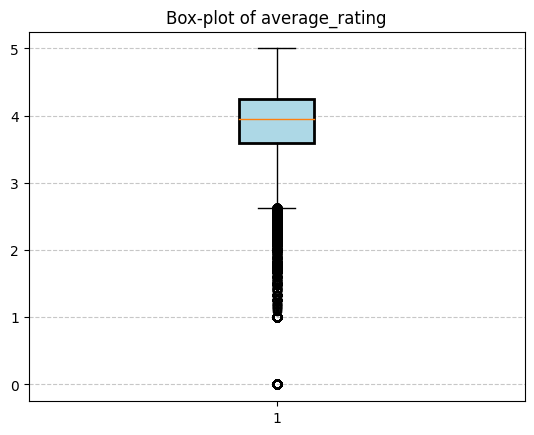

In [ ]:
media = authors2['average_rating'].mean()
mediana = authors2['average_rating'].median()
minimo = authors2['average_rating'].min()
massimo = authors2['average_rating'].max()

print("Base statistics on average_rating")
print("mean", round(media, 2))
print("median", mediana)
print("min and max", minimo, massimo)

plt.boxplot(authors2["average_rating"], showfliers=True, patch_artist=True, boxprops={'facecolor': 'lightblue', 'linestyle': '--', 'linewidth': 2})
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.title("Box-plot of average_rating")
plt.show

From this, we summarize that the mean average rating of authors is 3.65 in a range of 0.0 to 5.0 and the median is 3.95 which essentially means 50% of the sample population fall between the average rating of 0 and 3.95.

Base statistics on fans_count
mean 111.62
median 4.0
min and max 0 766035


<function matplotlib.pyplot.show(close=None, block=None)>

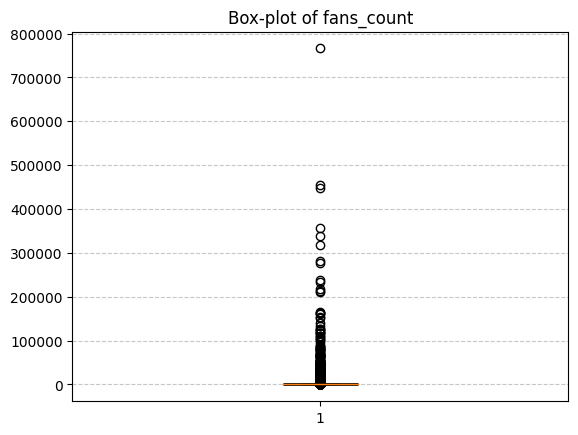

In [ ]:
media = authors2['fans_count'].mean()
mediana = authors2['fans_count'].median()
minimo = authors2['fans_count'].min()
massimo = authors2['fans_count'].max()

print("Base statistics on fans_count")
print("mean", round(media, 2))
print("median", mediana)
print("min and max", minimo, massimo)

plt.boxplot(authors2["fans_count"], patch_artist=True, boxprops={'facecolor': 'lightblue', 'linestyle': '--', 'linewidth': 2}, showfliers=True)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.title("Box-plot of fans_count")
plt.show

Fans count is rather stretched in a vast range of 0 to 766035 with a mean at 111.62 and median at 4.0 with a very high variance.

Base statistics on ratings_count
mean 4770.95
median 39.0
min and max 0 27003752


<function matplotlib.pyplot.show(close=None, block=None)>

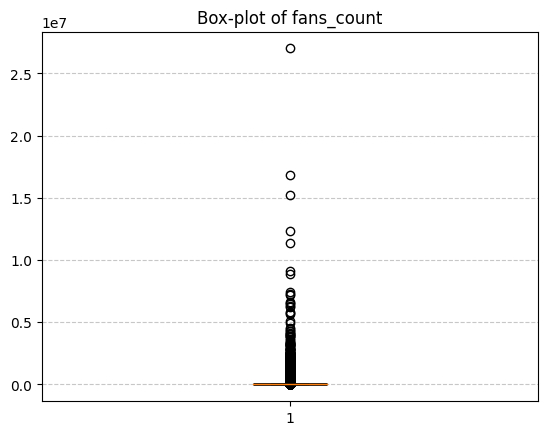

In [ ]:
media = authors2['ratings_count'].mean()
mediana = authors2['ratings_count'].median()
minimo = authors2['ratings_count'].min()
massimo = authors2['ratings_count'].max()

print("Base statistics on ratings_count")
print("mean", round(media, 2))
print("median", mediana)
print("min and max", minimo, massimo)

plt.boxplot(authors2["ratings_count"], patch_artist=True, boxprops={'facecolor': 'lightblue', 'linestyle': '--', 'linewidth': 2}, showfliers=True)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.title("Box-plot of fans_count")
plt.show

ratings count is also showing a high variance with mean at 4770.95 and median at 39 in a range of 0 to 27002752

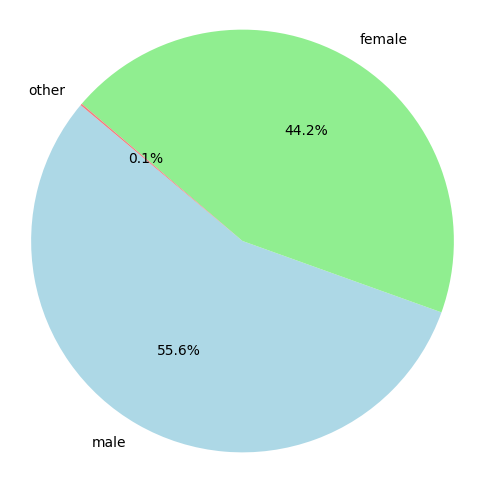

In [ ]:
count_output = authors2['gender'].value_counts().reset_index()
count_output.columns = ['gender', 'count']
count_output_ordinato = count_output.sort_values(by='count', ascending=False)
count_output_ordinato = count_output_ordinato[count_output_ordinato["gender"] != ""]
malefemale = count_output_ordinato[count_output_ordinato["gender"].isin(["male", "female"])]
others = pd.DataFrame({"gender": ["other"], "count": [count_output_ordinato["count"].sum() - malefemale["count"].sum()]})
malefemale = pd.concat([malefemale, others], ignore_index=True)
plt.figure(figsize=(6, 6))
plt.pie(malefemale['count'], labels=malefemale['gender'], autopct='%1.1f%%', colors=['lightblue', 'lightgreen', 'lightcoral'], startangle=140)
plt.title('')
plt.axis('equal')
plt.show()

We have considered the major two Genders Male and Female and clubbed all other genders in the Others category and found that 55.6% of the sample population are males and 44.2% are females and 0.1% falling in the others category.

Exploratory Data Analysis on Books Set

Base statistics on average_rating
mean 3.31
median 3.81
min and max 0.0 5.0


<function matplotlib.pyplot.show(close=None, block=None)>

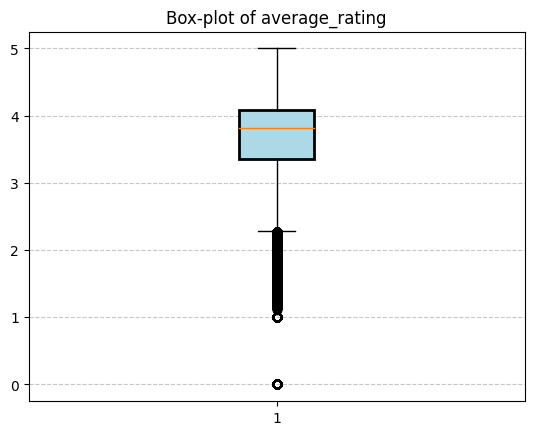

In [ ]:
media = books2['average_rating'].mean()
mediana = books2['average_rating'].median()
minimo = books2['average_rating'].min()
massimo = books2['average_rating'].max()

print("Base statistics on average_rating")
print("mean", round(media, 2))
print("median", round(mediana, 2))
print("min and max", minimo, massimo)

plt.boxplot(books2["average_rating"], patch_artist=True, boxprops={'facecolor': 'lightblue', 'linestyle': '--', 'linewidth': 2}, showfliers=True)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.title("Box-plot of average_rating")
plt.show

Average rating in the books dataset has a mean at 3.31 with a median at 3.81 in a range of 0.0 to 5.0, it reflects less variance as standard deviation is 1.4 compared to others.

Base statistics on ratings_count
mean 19458.61
median 45.0
min and max 0 7400639


<function matplotlib.pyplot.show(close=None, block=None)>

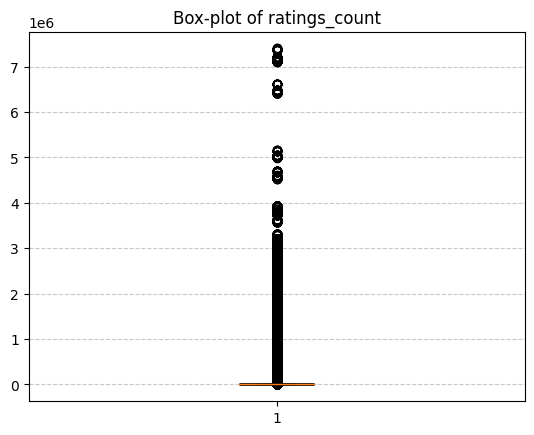

In [ ]:
media = books2['ratings_count'].mean()
mediana = books2['ratings_count'].median()
minimo = books2['ratings_count'].min()
massimo = books2['ratings_count'].max()

print("Base statistics on ratings_count")
print("mean", round(media, 2))
print("median", round(mediana, 2))
print("min and max", minimo, massimo)

plt.boxplot(books2["ratings_count"], patch_artist=True, boxprops={'facecolor': 'lightblue', 'linestyle': '--', 'linewidth': 2}, showfliers=True)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.title("Box-plot of ratings_count")
plt.show

Ratings count has a large variance with a mean at 19458.61 but a median at 45.0

  language    count
0      eng  1372114
1      ger   148087
2      spa   137292
3      ita   125287
4      fre   121062
5    en-US    85551
6      por    73162
7    en-GB    70281
8       nl    63853
9      ara    51034


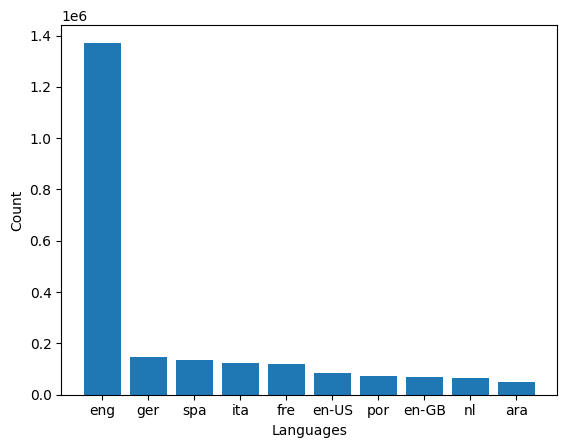

In [ ]:
books2clean = books2[books2["language"] != ""]
conteggio_output = books2clean['language'].value_counts().reset_index()
conteggio_output.columns = ['language', 'count']
conteggio_output = conteggio_output.dropna()  # Rimuovo le righe con valori mancanti
conteggio_output_ordinato = conteggio_output.sort_values(by='count', ascending=False)
print(conteggio_output_ordinato.head(10))

primi10 = conteggio_output_ordinato.head(10)
plt.bar(primi10["language"], primi10['count'])
plt.xlabel('Languages')
plt.ylabel('Count')
plt.show()

Initially doing this plot revealed that the language column has a lot of empty values with the highest count, hence we cleaned the dataset further specific to the language attribute to negate empty cells in the language column and used books2clean for this analysis and found that, Books in English language has the highest count with the count of german, spanish,italianb and other european languages much lesser and closer to each other. Although, to do a simplistic visualisation we have considered the top 10 languages in terms of count.

## RQ 2: Retrieving some vital information:

### Plot the number of books for each author in descending order.

In [ ]:
books2=books2[books2['author_name']!='Anonymous']
books2=books2[books2['author_name']!='']
books2=books2[books2['author_name']!='Various']
books2=books2[books2['author_name']!='Unknown']
books2=books2[books2['author_name']!='NOT A BOOK']
books2=books2[books2['author_name']!='Source Wikipedia']
#book_clean=book_clean[book_clean['title']!='']

While doing the plot in the next cells, I found a lot of such weird author names with high number of books, hence I have specifically removed them out from my books2 dataframe.

In [ ]:
books2.drop_duplicates(subset = ["author_name","title"], keep="first", inplace=True)

For the combination of authors and titles, we have dropped all subsequent duplicate occurrences.

In [ ]:
books2.shape[0]

4145044

In [ ]:
author_book_counts = books2.groupby(['author_name','author_id'])['title'].count().reset_index().sort_values(by='title', ascending=False)[:50]

Taking the top 50 authors according to book counts and storing in author_book_counts dataframe.

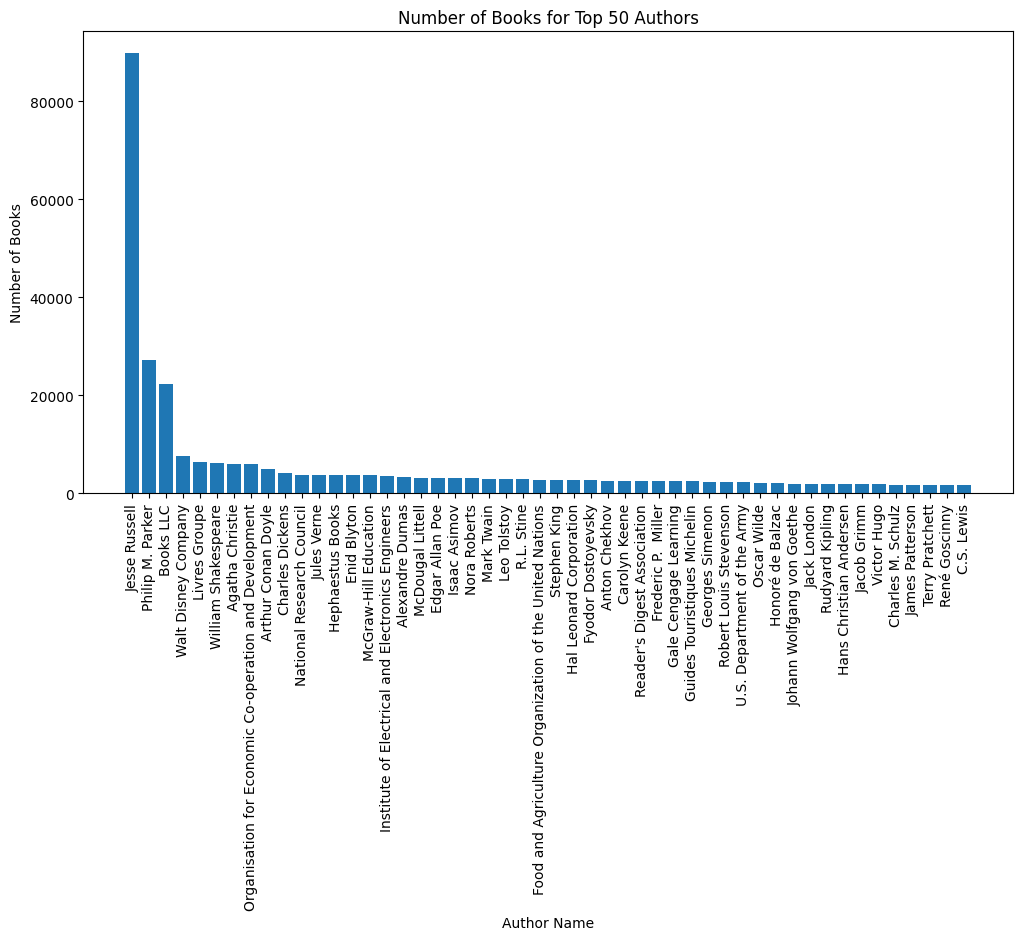

In [ ]:
# author names and book counts for top 50 authors
plt.figure(figsize=(12, 6))
plt.bar(author_book_counts['author_name'], author_book_counts['title'])
plt.xticks(rotation=90)
plt.xlabel('Author Name')
plt.ylabel('Number of Books')
plt.title('Number of Books for Top 50 Authors')
plt.show()

We have done the plot for the top 50 authors in terms of number of books and found that Jesse Russell has the highest number of books followed by Phillip M. Parker. CS Lewis falls in the very last of the list.

### Which book has the highest number of reviews?

In [ ]:
books2_sorted = books2.sort_values(by='text_reviews_count', ascending=False).reset_index()[:5]
print(f"The book with the highest number of text reviews is '{books2_sorted['title'][0]}' with {books2_sorted['text_reviews_count'][0]} reviews.")

The book with the highest number of text reviews is 'Arena smrti (Igre lakote #1)' with 174518 reviews.


To identify the highest number of reviews, I considered the text reviews count and found that Arena smrti (Igre lakote #1) has got the highest.

### Which are the top ten and ten worst books concerning the average score?

In [ ]:
# Sorting books by average rating in descending order for the top ten
ten_best_books = books2.nlargest(10, 'average_rating')[['title','average_rating']]
# Sorting books by average rating in ascending order for the ten worst
ten_worst_books= books2.nsmallest(10, 'average_rating')[['title','average_rating']]
# Printing the top ten and ten worst books
print("Top Ten Books with Highest Average Rating:\n")
print(ten_best_books)
print("\nTen Worst Books with Lowest Average Rating:\n")
print(ten_worst_books)

Top Ten Books with Highest Average Rating:

                                                  title  average_rating
178   Later Letters of Edward Lear to Chichester For...             5.0
386                     Lord of the Flies Activity Pack             5.0
653                                          Bernie Mac             5.0
671   Delaware 1638-1776 (Voices from Colonial America)             5.0
721   Simply Italian: 100 Easy-To-Make, Zesty, Satis...             5.0
762                                    Rudolph Giuliani             5.0
1101           Singers, Heroes, and Gods in the Odyssey             5.0
1120  Fanaroff and Martin's Neonatal-Perinatal Medic...             5.0
1213                                   A Den Of Thieves             5.0
1252  Comoediae 1: Acharenses/Equites/Nubes/Vespae/P...             5.0

Ten Worst Books with Lowest Average Rating:

                                                  title  average_rating
526                                  A More Pe

### Explore the different languages in the book’s dataset, providing a proper chart summarizing how these languages are distributed throughout our virtual library.

For exploring the languages, earlier we had cleaned the dataset in terms of language as 'books2clean' and we will use that here:

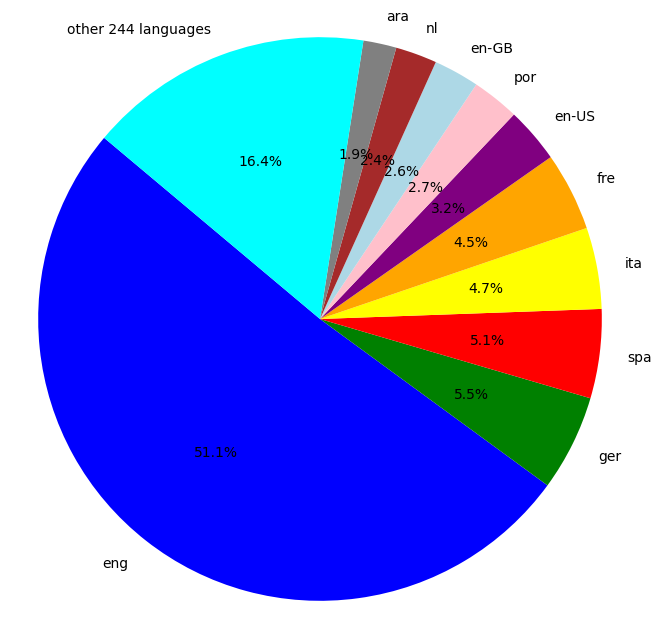

In [ ]:
lang_counts = books2clean['language'].value_counts().reset_index()
lang_counts.columns = ['language', 'count']  # Correcting the column assignment
(lang_counts.shape[0])

top50lang = lang_counts.head(50)
(top50lang.head(2))

top10lang = lang_counts[lang_counts["language"].isin(["eng", "ger", "spa", "fre", "ita", "en-US", "por", "en-GB", "nl", "ara"])]
(top10lang.head(10))

riga_altro = pd.DataFrame({"language": ["other 244 languages"], "count": [lang_counts["count"].sum() - top10lang["count"].sum()]})
top10lang = pd.concat([top10lang, riga_altro], ignore_index=True)

plt.figure(figsize=(8, 8))
plt.pie(top10lang['count'], labels=top10lang['language'], autopct='%1.1f%%', colors=['blue', 'green', 'red', 'yellow', 'orange', 'purple', 'pink', 'lightblue', 'brown', 'gray', 'cyan'], startangle=140)
plt.title('')
plt.axis('equal')
plt.show()


To do this analysis, we have taken top 10 languages in terms of their frequency of occurrences and clubbed all other languages in the others category. Then we found that English is 51.1% which conveys half of the books in the entire dataset are written in English followed by German (5.5%), Spanish (5.1%) when ranked in terms od their frequency.

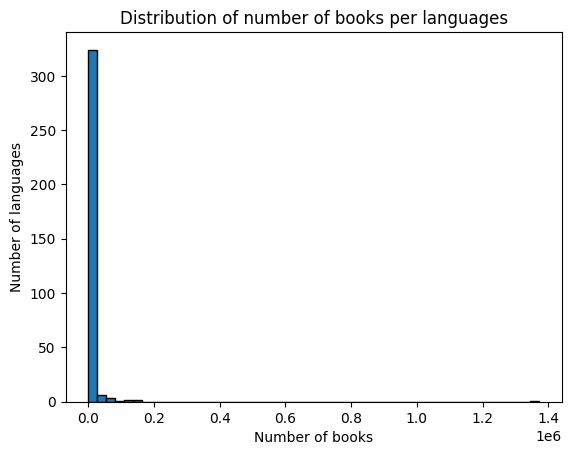

In [ ]:
plt.hist(lang_counts['count'], bins=50, edgecolor='k')
plt.xlabel('Number of books')
plt.ylabel('Number of languages')
plt.title('Distribution of number of books per languages')
plt.show()

### How many books have more than 250 pages?

In [ ]:
books2['num_pages'] = pd.to_numeric(books2['num_pages'], errors='coerce')

In [ ]:
print(f'Number of books with more than 250 pages is {books2[(books2[["num_pages"]] > 250).all(axis=1)].shape[0]}')

Number of books with more than 250 pages is 1060768


### Plot the distribution of the fans count for the 50 most prolific authors (the ones who have written more books).

In the previous questions earlier, we found out the top 50 authors in terms of book counts from the books dataset and stored them into author_book_counts dataframe, now we will extract the top 50 authors from there and merge with the authors dataset matching with author_name and author_id as the primary keys.

In [ ]:
top50author = author_book_counts
top50author = top50author.rename(columns={"author_name": "name","author_id":"id"})

In [ ]:
merged_df = pd.merge(top50author, authors2, on=['name','id'], how='left')

In [ ]:
merged_df.shape[0]

50

In [ ]:
merged_df=merged_df.sort_values(by='fans_count', ascending=False)

In [ ]:
merged_df[["name","fans_count"]].head(5)

name  fans_count
25        Stephen King      766035
46     James Patterson      317040
6      Agatha Christie       44456
20        Nora Roberts       41402
27  Fyodor Dostoyevsky       37150

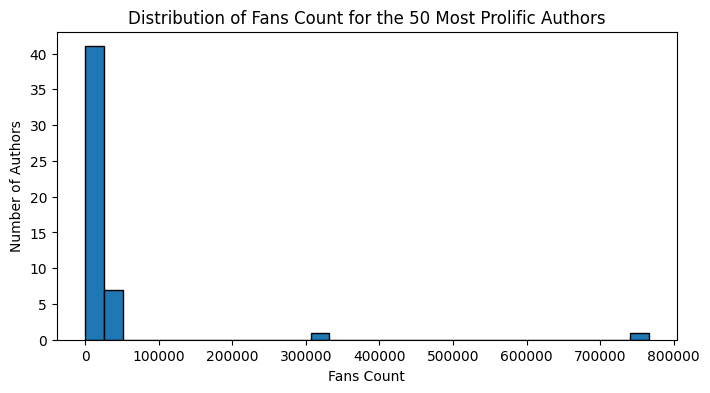

In [ ]:
# Plot the distribution of fans count
plt.figure(figsize=(8, 4))
plt.hist(merged_df['fans_count'], bins=30, edgecolor='k')
plt.xlabel('Fans Count')
plt.ylabel('Number of Authors')
plt.title('Distribution of Fans Count for the 50 Most Prolific Authors')
plt.show()

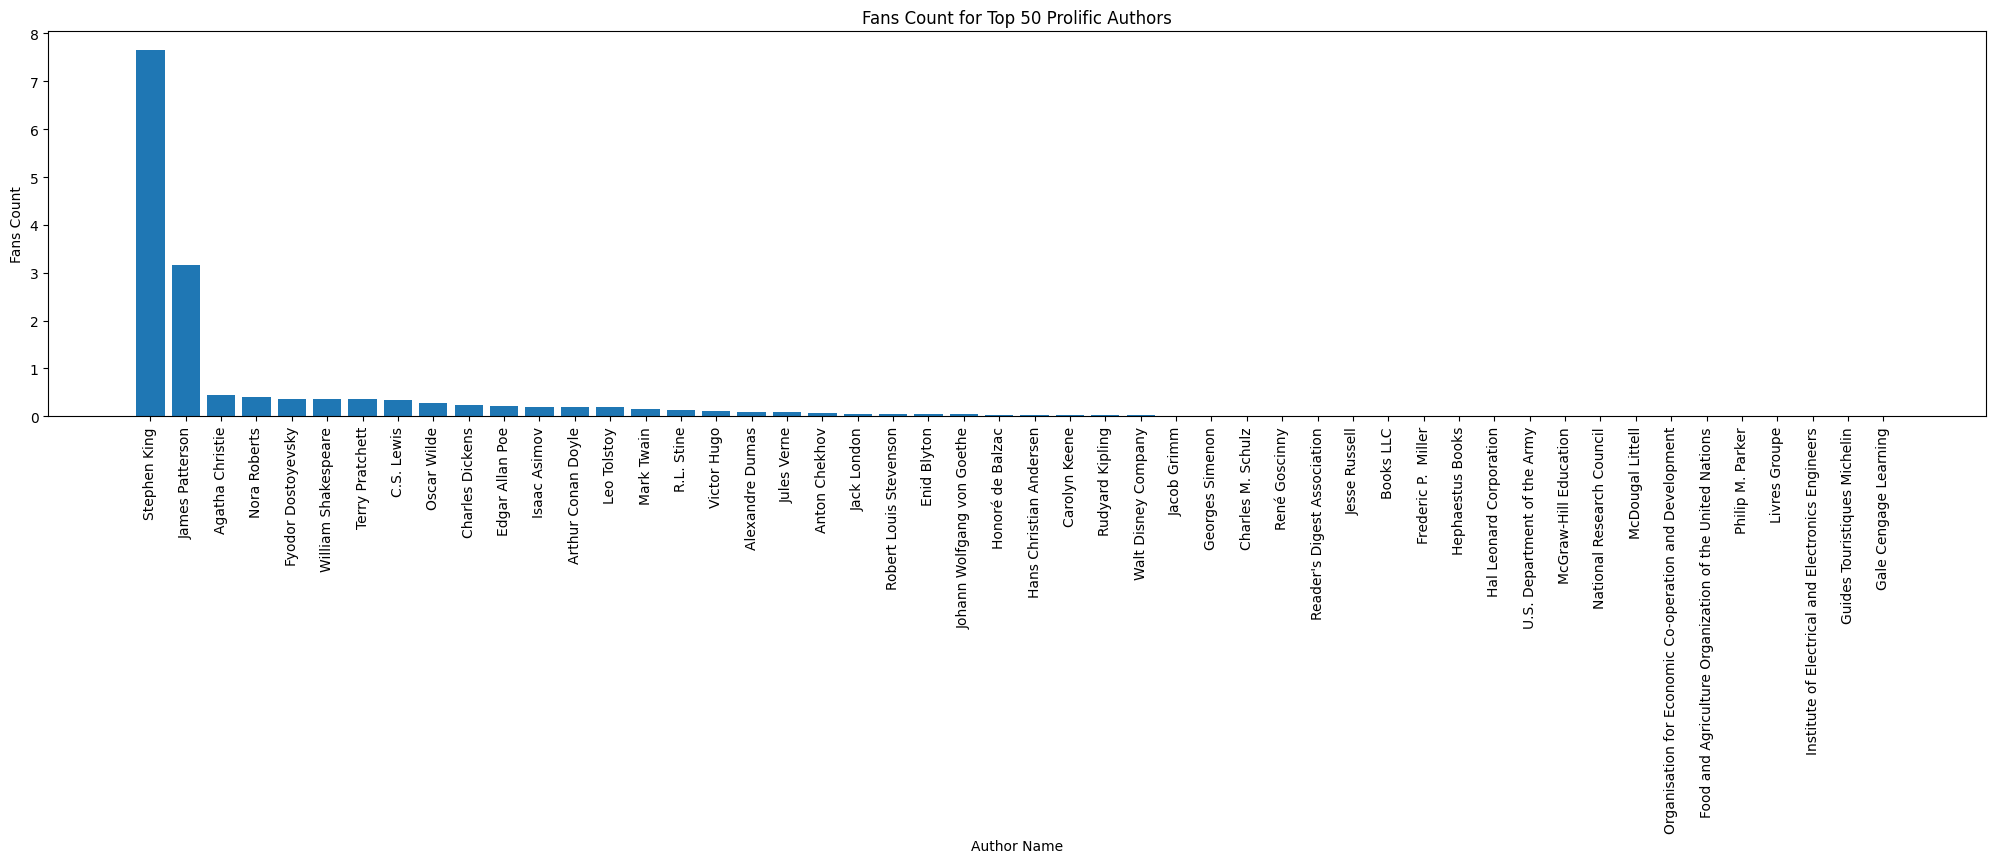

In [ ]:
plt.figure(figsize=(25, 5))
plt.bar(merged_df['name'], merged_df['fans_count']/100000) #i have normalized the count
plt.xticks(rotation=90)
plt.xlabel('Author Name')
plt.ylabel('Fans Count')
plt.yticks(np.arange(0, 9, step=1))
plt.title('Fans Count for Top 50 Prolific Authors')
plt.show()

As the plot shows, Stephen King has got the highest fans count followed by James Patterson and Agatha Christie among the top 50 authors.

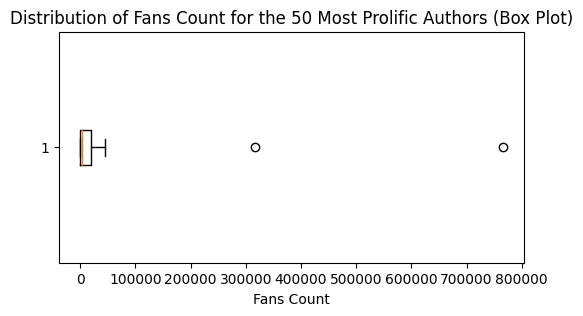

In [ ]:
plt.figure(figsize=(6, 3))
plt.boxplot(merged_df['fans_count'], vert=False)
plt.xlabel('Fans Count')
plt.title('Distribution of Fans Count for the 50 Most Prolific Authors (Box Plot)')
plt.show()

## RQ 3: Historical look at the dataset!

In [ ]:
# num_pages field needs data cleaning
books2 = books2[books2['num_pages'].notna()]
books2 = books2[books2['num_pages'] != 0]

In [ ]:
#data cleaning on original publication date
from datetime import datetime
books2["original_publication_date"] = pd.to_datetime(books2["original_publication_date"], errors='coerce')
books2["original_publication_date"] = pd.to_datetime(books2["original_publication_date"])
present_date = datetime.now()
books2 = books2[books2['original_publication_date'] <= present_date]
books2["original_publication_date"].max()

Timestamp('2023-10-14 00:00:00')

In [ ]:
books2["original_publication_date"].min()

Timestamp('1678-01-01 00:00:00')

My vision of work is that I am considering the original publication date values which are valid values starting from 01 January 1678 till 14 October 2023 and other dates which are in the farthest future, way above the present date, I am not considering because those books have not been published yet referring to unrequired data as I am working with books which are already punlished.

### Write a function that takes as input a year and returns as output the following information:

The number of books published that year.

The total number of pages written that year.

The most prolific month of that year.

The longest book written that year.



In [ ]:
def books_info_for_year(year):

    books_in_year = books2[books2['original_publication_date'].dt.year == year]

    # total number of books published in the given year
    Num_Books = len(books_in_year)

    # total number of pages written in the given year
    Total_Pages = books_in_year.loc[:,'num_pages'].sum()

    # to count the most prolific month
    #books_in_year['publication_month'] = books_in_year['original_publication_date'].dt.month
    books_in_year['publication_month'] = books_in_year.loc[:,'original_publication_date'].dt.month

    Most_Prolific_Month = None
    longest_book = None

    if not books_in_year.empty:
        # to find the most prolific month
        #books_in_year['month'] = books_in_year['original_publication_date'].dt.month
        books_in_year['month'] = books_in_year.loc[:,'original_publication_date'].dt.month
        Most_Prolific_Month = books_in_year['month'].value_counts().idxmax()

        # the longest book written in that year
        longest_book = books_in_year[books_in_year['num_pages'] == books_in_year['num_pages'].max()]['title'].values[0]



    return Num_Books, Total_Pages, Most_Prolific_Month, longest_book


In [ ]:
import time
year = 2005
start_time=time.time()
result = books_info_for_year(year)
end_time=time.time()
print(result)
print(f"Time taken: {end_time - start_time:.2f} seconds")

(63973, 16853752.0, 1, 'The Great Adventure Cookbook: Trail-Tested Recipes from Leading Backcountry Adventures')
Time taken: 0.54 seconds


<ipython-input-58-9faa3a9fad87>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_in_year['publication_month'] = books_in_year.loc[:,'original_publication_date'].dt.month
<ipython-input-58-9faa3a9fad87>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_in_year['month'] = books_in_year.loc[:,'original_publication_date'].dt.month


### Use this function to build your data frame: the primary key will be a year, and the required information will be the attributes within the row. Finally, show the head and the tail of this new data frame considering the first ten years registered and the last ten years.



In [ ]:
years = books2['original_publication_date'].dt.year.unique()
yearly_info = pd.DataFrame(columns=['Year', 'Num_Books', 'Total_Pages', 'Most_Prolific_Month', 'Longest_Book'])
start_time=time.time()
for year in years:
  Num_Books, Total_Pages, Most_Prolific_Month, Longest_Book = books_info_for_year(year)
  yearly_info = yearly_info.append({'Year': year, 'Num_Books': Num_Books, 'Total_Pages': Total_Pages, 'Most_Prolific_Month': Most_Prolific_Month, 'Longest_Book': Longest_Book}, ignore_index=True)

end_time=time.time()

<ipython-input-58-9faa3a9fad87>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_in_year['publication_month'] = books_in_year.loc[:,'original_publication_date'].dt.month
<ipython-input-58-9faa3a9fad87>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_in_year['month'] = books_in_year.loc[:,'original_publication_date'].dt.month
<ipython-input-60-771fd65b3bb4>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  

In [ ]:
print(f"Time taken to load DF: {end_time - start_time:.2f} seconds")

Time taken to load DF: 114.42 seconds


In [ ]:
print(yearly_info.head(10))

   Year Num_Books   Total_Pages Most_Prolific_Month  \
0  2003     56217  1.490876e+07                   1   
1  1997     39896  2.160443e+09                   1   
2  1998     42232  1.127554e+07                   1   
3  1999     44409  1.188484e+07                   1   
4  2000     49752  1.336568e+07                   1   
5  2005     63973  1.685375e+07                   1   
6  1979     12394  3.289386e+06                   1   
7  1996     36964  9.925570e+06                   1   
8  2002     52445  1.396145e+07                   1   
9  1984     16501  4.365857e+06                   1   

                                        Longest_Book  
0  Reformation Bookshelf Cd (Volume 19 Of 30) The...  
1                                  שלושה סיפורי אהבה  
2     American Men & Women of Science (8-Volume Set)  
3  Theological and Miscellaneous Works of Joseph ...  
4                 Combo - As Crônicas de Gelo e Fogo  
5  The Great Adventure Cookbook: Trail-Tested Rec...  
6        

In [ ]:
print(yearly_info.tail(10))

     Year Num_Books  Total_Pages Most_Prolific_Month  \
336  1690        31       6593.0                   1   
337  1770        23       6491.0                   1   
338  1715        22      10394.0                   4   
339  1735        15       5065.0                   1   
340  1679         9       1666.0                   1   
341  1718        10       2986.0                   1   
342  1694         9       1095.0                   1   
343  2021        21       8432.0                   1   
344  2022         6        979.0                  12   
345  2023         3        875.0                   9   

                                          Longest_Book  
336             Versuch �ber den menschlichen Verstand  
337          Travels Into North America - 3 Volume Set  
338                             Gil Blas de Santillane  
339  Mémoires du chevalier d'Arvieux, envoyé extrao...  
340  Strange Stories from a Chinese Studio, Vol. 1 ...  
341                                 Histó

### Ask ChatGPT or any other LLM chatbot tool to implement this function and compare your work with the one the bot gave you as an answer. Does the chatbot implementation work? Please test it out and verify the correctness of the implementation, explaining the process you followed to prove it.

In [ ]:
# Following implementation is done by Chat GPT 4.0:

def books_info(year):
    # filter the dataframe by the given year
    books_in_year = books2[books2['original_publication_date'].dt.year == year]

    # calculate the number of books published that year
    num_books = books_in_year.shape[0]

    # calculate the total number of pages written that year
    total_pages = books_in_year['num_pages'].sum()

    # calculate the most prolific month of that year
    most_prolific_month = books_in_year['original_publication_date'].dt.month.value_counts().idxmax()

    # find the longest book written that year
    longest_book = books_in_year.loc[books_in_year['num_pages'].idxmax()]['title']

    return {
        "Number of books published": num_books,
        "Total number of pages": total_pages,
        "Most prolific month": most_prolific_month,
        "Longest book": longest_book,
    }

In [ ]:
import time
year = 2005
start_time=time.time()
result = books_info(year)
end_time=time.time()
print(result)
print(f"Time taken: {end_time - start_time:.2f} seconds")

{'Number of books published': 63973, 'Total number of pages': 16853752.0, 'Most prolific month': 1, 'Longest book': 'The Great Adventure Cookbook: Trail-Tested Recipes from Leading Backcountry Adventures'}
Time taken: 0.56 seconds


In [ ]:
# Following function is implemented by Bard LLM of Google:

import pandas as pd

def get_book_stats_by_year(books2, year):
  """Get book stats by year.

  Args:
    books2: A pandas DataFrame containing book data.
    year: The year to get book stats for.

  Returns:
    A dictionary containing the following information:
      * The number of books published that year.
      * The total number of pages written that year.
      * The most prolific month of that year.
      * The longest book written that year.
  """

  # Filter the books2 DataFrame to only include books published in the given year.
  books_by_year = books2[books2['original_publication_date'].dt.year == year]

  # Get the number of books published that year.
  num_books_published = len(books_by_year)

  # Get the total number of pages written that year.
  total_pages_written = books_by_year['num_pages'].sum()

  # Get the most prolific month of that year.
  most_prolific_month = books_by_year['original_publication_date'].dt.month.value_counts().nlargest(1).index[0]

  # Get the longest book written that year.
  longest_book = books_by_year[books_by_year['num_pages'] == books_by_year['num_pages'].max()]

  return {
    'num_books_published': num_books_published,
    'total_pages_written': total_pages_written,
    'most_prolific_month': most_prolific_month,
    'longest_book': longest_book
  }

In [ ]:
import time
year = 2005
start_time=time.time()
result = get_book_stats_by_year(books2,year)
end_time=time.time()
print(result)
print(f"Time taken: {end_time - start_time:.2f} seconds")

{'num_books_published': 63973, 'total_pages_written': 16853752.0, 'most_prolific_month': 1, 'longest_book':          author_id                                              title  \
3686219     323872  The Great Adventure Cookbook: Trail-Tested Rec...   

         num_pages language  average_rating  ratings_count  \
3686219     8950.0                      0.0              0   

         text_reviews_count            author_name original_publication_date  \
3686219                   0  McGraw-Hill Education                2005-12-01   

        publication_date     format series_id series_name series_position  
3686219       2005-12-01  Hardcover                                        }
Time taken: 0.63 seconds


**Analyis and Remarks on the LLM Implementation:**

The implementation by Chat GPT is commendable as the results are just the similar. To compare the time taken by my function and by Chat GPT I have separately printed the time taken in the results. My function books_info_for_year prints the result in 0.54 seconds, while the implementation by Chat GPT takes 0.56 seconds but the same by Google Bard LLM takes 0.63 seconds. Anyhow, the core logic of defining the function remains same in either cases. Chat GPT can atmost be a complement to my own work but not a substitute for it.

## RQ 4: Quirks questions about consistency.

### You should be sure there are no eponymous (different authors who have precisely the same name) in the author's dataset. Is it true?

In [ ]:
eponymous_authors = authors2[authors2.duplicated('name', keep=False)]
if not eponymous_authors.empty:
    print("Eponymous authors found: "+str(eponymous_authors.shape[0]))
    print(eponymous_authors['name'])


Eponymous authors found: 74
1569             Peter King
4792            David Yates
6414            Paul Graham
7193          Peter  Davies
8639        Peter  Marshall
                ...        
314855        Dimitar Dimov
315853    James C.L. Carson
319671        Erin  Bedford
337525              Cicerón
345485        Erin  Bedford
Name: name, Length: 74, dtype: object


Thus, we have got 74 eponymous authors in the authors dataset

### Write a function that, given a list of author_id, outputs a dictionary where each author_id is a key, and the related value is a list with the names of all the books the author has written.

In [ ]:
def get_author_books_v0(author_ids):
    author_books = {}
    for author_id in author_ids:
        matching_rows = authors2[authors2['id'] == author_id]
        if not matching_rows.empty:
            author_name = matching_rows.iloc[0]['name']
            # Check if 'author_name' is present in the 'books2' DataFrame
            if 'author_name' in books2.columns:
                books = books2[books2['author_name'] == author_name]['title'].tolist()
                author_books[author_name] = books
            else:
                # Handle the case where 'author_name' column is not found
                author_books[author_name] = ["Author's Books Not Found"]
        else:
            # Handle the case where no matching author is found
            author_books[author_name] = ["Author Not Found"]

    return author_books

### What is the longest book title among the books of the top 20 authors regarding their average rating? Is it the longest book title overall?

**Top 20 authors by average rating**

In [ ]:
top_20_authors_v0 = authors2.nlargest(20, 'average_rating')
top_20_author_ids_v0 = top_20_authors_v0['id'].tolist()

*Get books of the top 20 authors*

In [ ]:
top_20_author_books_v0 = get_author_books_v0(top_20_author_ids_v0)

In [ ]:
longest_title_v0 = max(max(top_20_author_books_v0.values(), key=len), key=len)

In [ ]:
overall_longest_title_v0 = max(books2['title'], key=len)

In [ ]:
shortest_title_v0 = min(books2['title'], key=len)

In [ ]:
print("Top 20 authors' books:")
for author, books in top_20_author_books_v0.items():
    print(f"{author}: {books}")

Top 20 authors' books:
James T. Holmes: []
Georges Wellers: ['From Drancy to Auschwitz']
Jessie (Pierce) Trebesch: []
Staci Mauney: []
D.S.  Brown: []
George  Johnston: []
Patience Normoyle: []
Robert Sidney: ['The Poems of Robert Sidney']
Christine K. Fields: []
Ondeane Lourens: []
Bonnie Kelso: []
Nikos Dimitriou: []
J.M. van Zuiden: []
Archimandrite Gabriel: []
Giada Nizzoli: []
Carlo de Incontrera: []
Ayush Ashish: []
Lavelle Carlson: []
Tiffany Post: []
Brenda DeMoss Lanz: []


In [ ]:
print(f"Longest book title among the top 20 authors: {longest_title_v0}")

Longest book title among the top 20 authors: From Drancy to Auschwitz


In [ ]:
if longest_title_v0 == overall_longest_title_v0:
    print("The longest book title among the top 20 authors is the same as the longest book title overall.")
else:
    print("The longest book title among the top 20 authors is not the same as the longest book title overall.")

The longest book title among the top 20 authors is not the same as the longest book title overall.


In [ ]:
print(f"Overall Longest book title is: {overall_longest_title_v0}")

Overall Longest book title is: A Commentary and Review of Montesquieu's Spirit of Laws, Prepared for Press from the Original Manuscript in the Hands of the Publisher (1811): To Which Are Annexed, Observations on the Thirty-First Book, by the Late M. Condorcet. and Two Letters of Hel...


In [ ]:
print(f"Shortest book title overall: {shortest_title_v0}")

Shortest book title overall: a


###I can notice a lot of data of authors who have no books at all, this needs some further cleaning to do a proper analysis. Hence I will clean the authors dataset more according to the presence of author books in books dataset and redo the function implementations and answers to RQ 4 with an update to all the version 0 I did in the previous cells.

In [ ]:
authors_with_books = books2['author_name'].unique()

In [ ]:
authors_with_books

array(['J.K. Rowling', 'Douglas Adams', 'Bill Bryson', ...,
       'Charles W.  Lamb', 'Annie  Sullivan', 'Alexis Koetting'],
      dtype=object)

In [ ]:
authors_clean = authors2[authors2['name'].isin(authors_with_books)]

In [ ]:
authors_clean.shape[0]

229611

In [ ]:
def get_author_books(author_ids):
    author_books = {}
    for author_id in author_ids:
        matching_rows = authors_clean[authors_clean['id'] == author_id]
        if not matching_rows.empty:
            author_name = matching_rows.iloc[0]['name']
            # Check if 'author_id' is present in the 'books2' DataFrame
            if 'author_name' in books2.columns:
                books = books2[books2['author_name'] == author_name]['title'].tolist()
                author_books[author_name] = books
            else:
                # Handle the case where 'author_id' column is not found
                author_books[author_name] = ["Author's Books Not Found"]
        else:
            # Handle the case where no matching author is found
            author_books[author_name] = ["Author Not Found"]

    return author_books

In [ ]:
top_20_authors = authors_clean.nlargest(20, 'average_rating')
top_20_author_ids = top_20_authors['id'].tolist()

In [ ]:
top_20_author_books = get_author_books(top_20_author_ids)

In [ ]:
longest_title = max(max(top_20_author_books.values(), key=len), key=len)

In [ ]:
overall_longest_title = max(books2['title'], key=len)

In [ ]:
shortest_title = min(books2['title'], key=len)

In [ ]:
print("Top 20 authors' books:")
for author, books in top_20_author_books.items():
    print(f"{author}: {books}")

Top 20 authors' books:
Georges Wellers: ['From Drancy to Auschwitz']
Robert Sidney: ['The Poems of Robert Sidney']
Nancy Harding: ['The Social Construction of Management', 'The Social Construction Of Management (Inquiries In Social Construction Series)', 'On Being At Work: The Social Construction of the Employee']
Xavier Seoane Rivas: ['Presencias: a saudade do corredor de fondo', 'A dama da noite']
Mark D. Swartz: ["Get Wired, You're Hired!"]
John Iggulden: ['Breakthrough']
Henry S. Horn: ['Adaptive Geometry of Trees (Mpb-3), Volume 3']
Anne-Marie Corbin-Schuffels: ['Manes Sperber: Un Combat Contre La Tyrannie (1934-1960)']
Roland Winston: ['Nonimaging Optics', 'Selected Papers on Nonimaging Optics (S P I E Milestone Series)', 'Nonimaging Optics and Efficient Illumunation Systems: 2-4 August, 2004, Denver, Colorado, USA']
Sarah Pinter: ['The Crystal Shards', 'Electra']
Donald J. Young: ['The Shore of the Unknown: Poems', "Tom's War: Poems", 'Once by the Sea', 'The Ascending Star', 'Ne

In [ ]:
print(f"Longest book title among the top 20 authors: {longest_title}")

Longest book title among the top 20 authors: Reading the Old Testament for the First Time and a Sketch of the Jesus Myths


In [ ]:
if longest_title == overall_longest_title:
    print("The longest book title among the top 20 authors is the same as the longest book title overall.")
else:
    print("The longest book title among the top 20 authors is not the same as the longest book title overall.")

The longest book title among the top 20 authors is not the same as the longest book title overall.


In [ ]:
print(f"Overall Longest book title is: {overall_longest_title}")

Overall Longest book title is: A Commentary and Review of Montesquieu's Spirit of Laws, Prepared for Press from the Original Manuscript in the Hands of the Publisher (1811): To Which Are Annexed, Observations on the Thirty-First Book, by the Late M. Condorcet. and Two Letters of Hel...


In [ ]:
print(f"Shortest book title overall: {shortest_title}")

Shortest book title overall: a


##RQ 5: Authors with the most fans to be influential. Let’s have a deeper look.

As we have cleaned the authors dataset further as authors_clean, we can use this dataset to answer this question.

###Plot the top 10 most influential authors regarding their fan count and number of books. Who is the most influential author?

In [ ]:
top10fansbasis= authors_clean.nlargest(10,'fans_count')

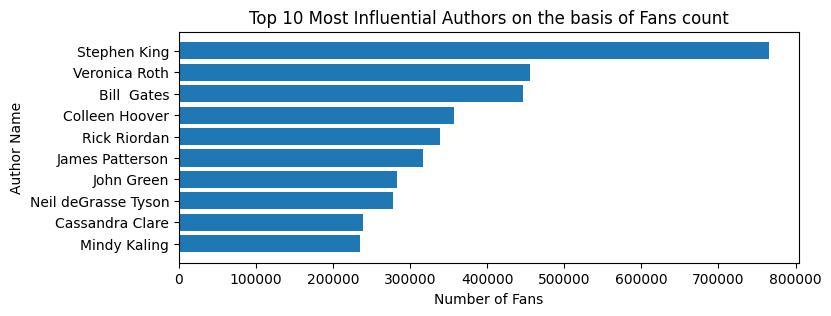

In [ ]:
plt.figure(figsize=(8, 3))
plt.barh(top10fansbasis['name'], top10fansbasis['fans_count'])
plt.xlabel('Number of Fans')
plt.ylabel('Author Name')
plt.title('Top 10 Most Influential Authors on the basis of Fans count')
plt.gca().invert_yaxis()  # Inverting the y-axis to display the most influential at the top
plt.show()

In [ ]:
top10worksbasis=authors_clean.nlargest(10,'works_count')

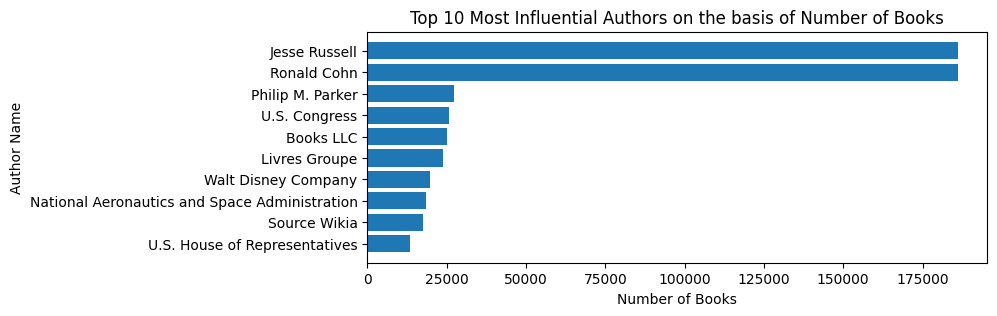

In [ ]:
plt.figure(figsize=(8, 3))
plt.barh(top10worksbasis['name'], top10worksbasis['works_count'])
plt.xlabel('Number of Books')
plt.ylabel('Author Name')
plt.title('Top 10 Most Influential Authors on the basis of Number of Books')
plt.gca().invert_yaxis()  # Inverting the y-axis to display the most influential at the top
plt.show()

Now I will combine the two columns to find the overall influence based on the combined metrics.

In [ ]:
authors_clean['influence'] = authors_clean['fans_count'] * authors_clean['works_count']


<ipython-input-105-214fb8cd2b99>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  authors_clean['influence'] = authors_clean['fans_count'] * authors_clean['works_count']


In [ ]:
top10authors=authors_clean.nlargest(10,'influence')

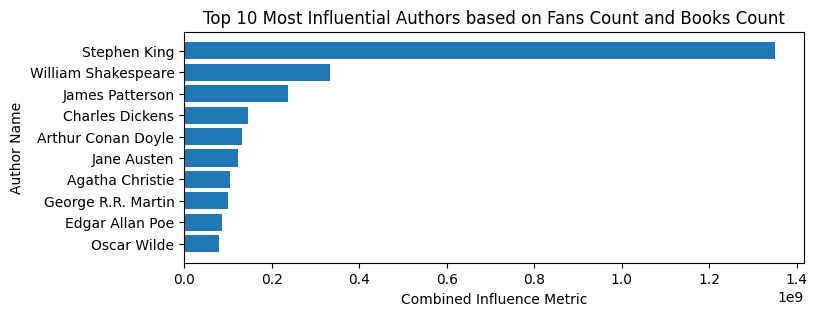

In [ ]:
plt.figure(figsize=(8, 3))
plt.barh(top10authors['name'], top10authors['influence'])
plt.xlabel('Combined Influence Metric')
plt.ylabel('Author Name')
plt.title('Top 10 Most Influential Authors based on Fans Count and Books Count')
plt.gca().invert_yaxis()  # Inverting the y-axis to display the most influential at the top
plt.show()

Hence, the Most Influential Author is Stephen King.

In [ ]:
influential_author_names = top10authors['name'].tolist()

In [ ]:
print(influential_author_names)

['Stephen King', 'William Shakespeare', 'James Patterson', 'Charles Dickens', 'Arthur Conan Doyle', 'Jane Austen', 'Agatha Christie', 'George R.R. Martin', 'Edgar Allan Poe', 'Oscar Wilde']


### Have they published any series of books? If any, extract the longest series name among these authors.

I am filtering the dataset only on the basis of the top 10 influential author names:

In [ ]:
book_series_data = books2[books2['author_name'].isin(influential_author_names)]

In [ ]:
book_series_data.shape[0]

16284

In [ ]:
book_series_data.head(3)

author_id                                       title  num_pages  \
865        947                   The Riverside Shakespeare     2057.0   
867        947                      The Norton Shakespeare     3420.0   
872        947  The Oxford Shakespeare: The Complete Works     1420.0   

    language  average_rating  ratings_count  text_reviews_count  \
865      eng            4.55           4270                 202   
867                     4.57           1848                  75   
872      eng            4.61            864                  56   

             author_name original_publication_date publication_date  \
865  William Shakespeare                1974-01-01             1997   
867  William Shakespeare                1972-01-01             1997   
872  William Shakespeare                1910-01-01       2005-08-01   

        format series_id series_name series_position  
865  Hardcover                                        
867  Hardcover                                        
872  Hardcover

In [ ]:
series = book_series_data.groupby('author_name')['series_name'].unique()

In [ ]:
series

author_name
Agatha Christie        [, Hercule Poirot, Miss Marple, Tommy & Tuppen...
Arthur Conan Doyle     [Sherlock Holmes, , The Adventures of Sherlock...
Charles Dickens        [, The Christmas Books, Master Humphrey's Cloc...
Edgar Allan Poe        [, C. Auguste Dupin, Tales of the Grotesque an...
George R.R. Martin     [A Song of Ice and Fire, , Wild Cards, The Art...
James Patterson        [, Alex Cross, Women's Murder Club, Maximum Ri...
Jane Austen                                                [, Juvenilia]
Oscar Wilde                               [, Fairy Tales of Oscar Wilde]
Stephen King           [The Dark Tower, , Skeleton Crew, The Talisman...
William Shakespeare    [, Poetry for Young People, The Nation's Favou...
Name: series_name, dtype: object

In [ ]:
longest_name = series.apply(lambda x: max(x, key=len)) #getting the longest series name out of each series in the top 10 authors.

In [ ]:
longest_name

author_name
Agatha Christie                 Hercule Poirot & Arthur Hastings Omnibus
Arthur Conan Doyle     Артур Конан Дойль. Собрание сочинений в восьми...
Charles Dickens               The Posthumous Papers of the Pickwick Club
Edgar Allan Poe        The Collected Supernatural and Weird Fiction o...
George R.R. Martin     Game of Thrones / Das Lied von Eis und Feuer (...
James Patterson                        The Best American Mystery Stories
Jane Austen                                                    Juvenilia
Oscar Wilde                                   Fairy Tales of Oscar Wilde
Stephen King                            Everything's Eventual [Japanese]
William Shakespeare                         The Nation's Favourite Poems
Name: series_name, dtype: object

In [ ]:
longest_series_name = longest_name[longest_name.str.len().idxmax()] #getting the longest series name out of the 10 series names

author_with_longest_series=", ".join(book_series_data[book_series_data['series_name']==longest_series_name]['author_name'].unique())


In [ ]:
print("Author with the Longest Series Name:", author_with_longest_series)
print("Longest Series Name:", longest_series_name)

Author with the Longest Series Name: Edgar Allan Poe
Longest Series Name: The Collected Supernatural and Weird Fiction of Edgar Allan Poe


### How many of these authors have been published in different formats? Provide a meaningful chart on the distribution of the formats and comment on it.



In [ ]:
unique_formats = book_series_data.groupby('author_name')['format'].unique()

In [ ]:
unique_formats

author_name
Agatha Christie        [Paperback, Hardcover, Audio CD, , Mass Market...
Arthur Conan Doyle     [Mass Market Paperback, Hardcover, Audio CD, P...
Charles Dickens        [Mass Market Paperback, Hardcover, Paperback, ...
Edgar Allan Poe        [Paperback, Hardcover, Audio CD, , Mass Market...
George R.R. Martin     [Paperback, Mass Market Paperback, Hardcover, ...
James Patterson        [Paperback, Mass Market Paperback, Hardcover, ...
Jane Austen            [Paperback, Hardcover, , Mass Market Paperback...
Oscar Wilde            [Paperback, Hardcover, Mass Market Paperback, ...
Stephen King           [Mass Market Paperback, Paperback, Hardcover, ...
William Shakespeare    [Hardcover, Paperback, Unknown Binding, , Libr...
Name: format, dtype: object

In [ ]:
formats_count = unique_formats.apply(lambda x: len(x)) #getting the count of unique formats of each of the top 10 authors

In [ ]:
formats_count

author_name
Agatha Christie        31
Arthur Conan Doyle     28
Charles Dickens        27
Edgar Allan Poe        29
George R.R. Martin     21
James Patterson        17
Jane Austen            16
Oscar Wilde            17
Stephen King           24
William Shakespeare    15
Name: format, dtype: int64

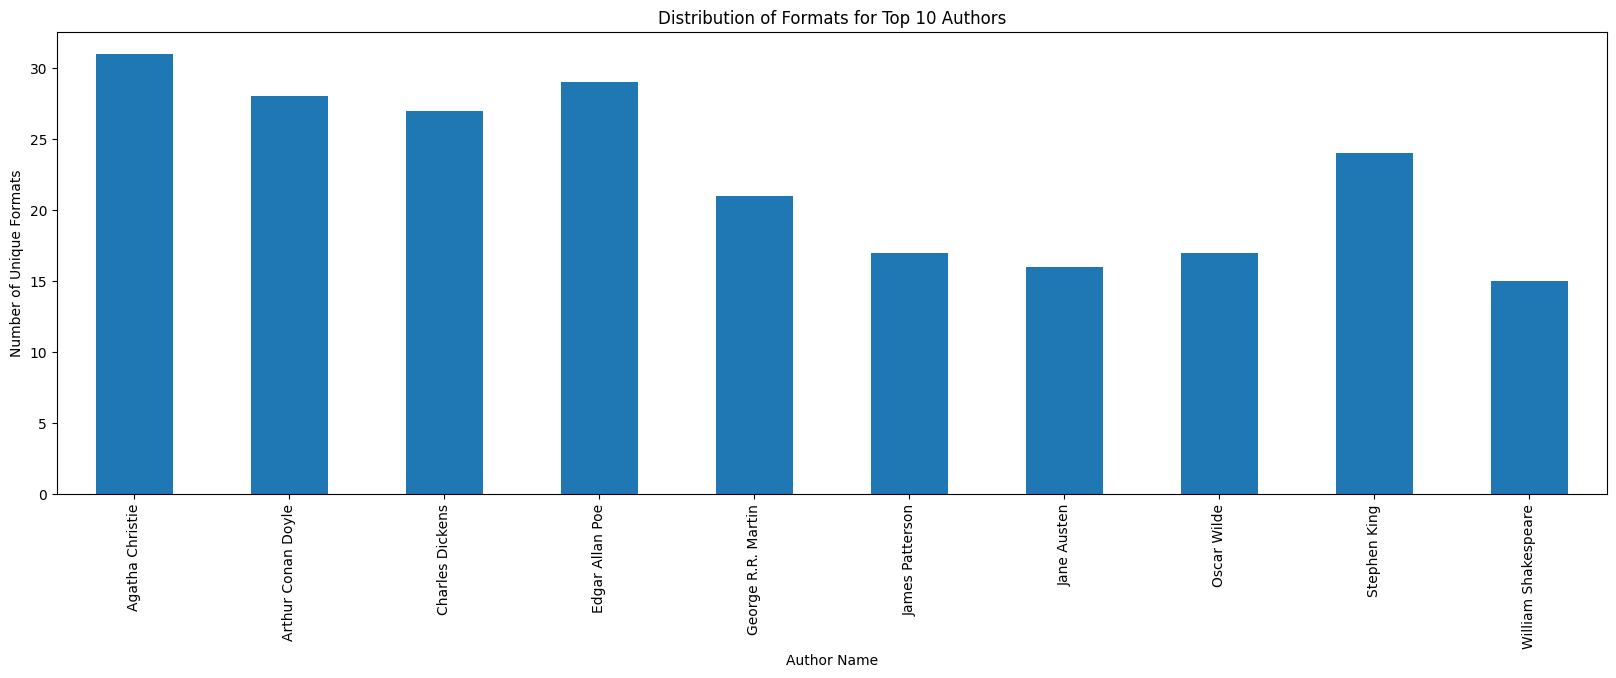

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 6))
formats_count.plot(kind='bar')
plt.title('Distribution of Formats for Top 10 Authors')
plt.xlabel('Author Name')
plt.ylabel('Number of Unique Formats')
plt.show()

This plot shows the distribution of unique format counts for all the top 10 authors.

###Provide information about the general response from readers (number of fans, average rating, number of reviews, etc.), divide the authors by gender, and comment about anything eventually related to “structural bias.” You may want to have a look at the following recommended readings:
You can even ask ChatGPT or any other LLM chatbot tool: try to formulate a prompt that provides helpful information about it. Put that information in your notebook and provide comments on what you found.

In [ ]:
summary_by_gender = top10authors.groupby('gender')[['fans_count', 'average_rating', 'text_reviews_count']].agg(['mean', 'std', 'min', 'max'])

In [ ]:
summary_by_gender

fans_count                               average_rating            \
             mean            std    min     max           mean       std   
gender                                                                     
female    47523.5    4338.100103  44456   50591        4.07000  0.084853   
male     163576.0  263563.002569  19044  766035        4.07625  0.165178   

                   text_reviews_count                                 
         min   max               mean            std     min     max  
gender                                                                
female  4.01  4.13          209991.00   38305.388550  182905  237077  
male    3.87  4.37          192184.25  193601.063698   38837  608956

**Summary:**

The table provides insights into the top 10 authors, specifically in terms of 'fans_count,' 'average_rating,' and 'text_reviews_count,' divided by gender (female and male). Here's a summary of the key statistics for each gender:

Female Authors:

The mean 'fans_count' for female authors is approximately 47523.5, with a standard deviation of 4338.10. The minimum 'fans_count' is 44,456, and the maximum is 50,591.
The mean 'average_rating' for female authors is around 4.07, with a standard deviation of 0.08. The lowest average rating is 4.01, and the highest is 4.13.
The mean 'text_reviews_count' for female authors is approximately 2,09,991.00, with a standard deviation of 38305.38. The lowest text reviews count is 182,905, and the highest is 237077.

Male Authors:

The mean 'fans_count' for male authors is about 163576.0, with a standard deviation of 263563.002. The minimum 'fans_count' is 19,044, and the maximum is 766035.
The mean 'average_rating' for male authors is approximately 4.076, with a standard deviation of 0.165. The lowest average rating is 3.87, and the highest is 4.37.
The mean 'text_reviews_count' for male authors is around 192184.25, with a standard deviation of 193601.06. The lowest text reviews count is 38837, and the highest is 608956.






**I asked ChatGPT to implement a Visualisation for this summary statistics and here it goes:**

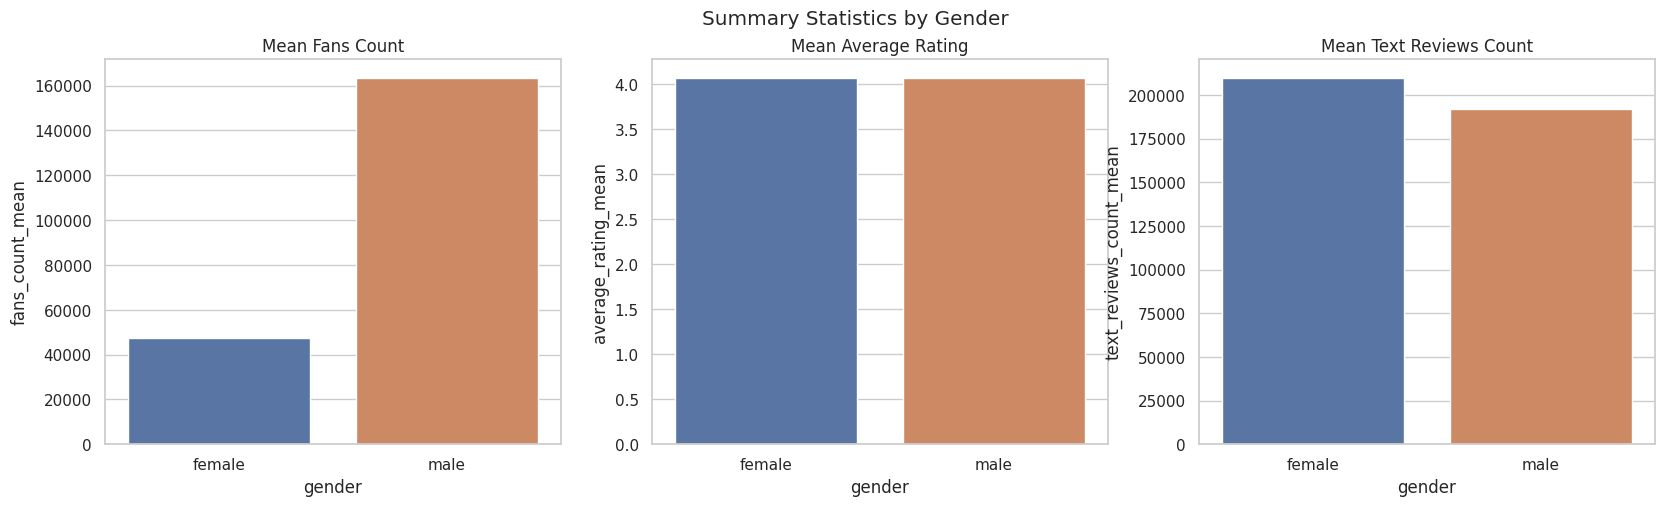

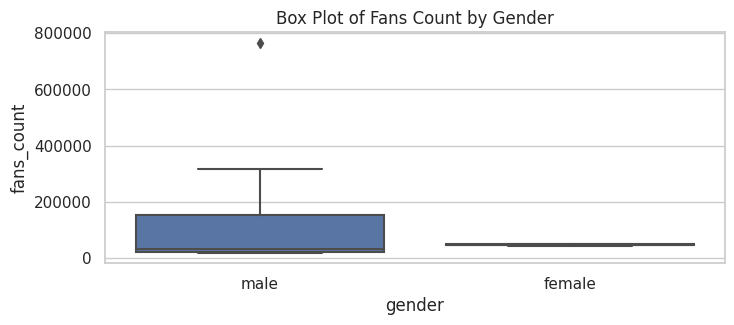

In [ ]:
import seaborn as sns

# Sample data (replace with your actual data)
mean_data = {
    'gender': ['female', 'male'],
    'fans_count_mean': [47523.5, 163576.0],
    'average_rating_mean': [4.07000, 4.07625],
    'text_reviews_count_mean': [209991.00, 192184.25]
}

# Create a DataFrame from the sample data
mean_df = pd.DataFrame(mean_data)

# Set the style for Seaborn
sns.set(style="whitegrid")

# Create a figure with subplots
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

# Bar chart for mean fans_count
sns.barplot(x="gender", y="fans_count_mean", data=mean_df, ax=axes[0])
axes[0].set(title="Mean Fans Count")

# Bar chart for mean average_rating
sns.barplot(x="gender", y="average_rating_mean", data=mean_df, ax=axes[1])
axes[1].set(title="Mean Average Rating")

# Bar chart for mean text_reviews_count
sns.barplot(x="gender", y="text_reviews_count_mean", data=mean_df, ax=axes[2])
axes[2].set(title="Mean Text Reviews Count")

# Add a common title for the subplots
plt.suptitle("Summary Statistics by Gender")

# Show the plots
plt.show()

# Create box plots to visualize data spread (you can adapt this)
# Example for 'fans_count'
plt.figure(figsize=(8, 3))
sns.boxplot(x='gender', y='fans_count', data=top10authors)
plt.title("Box Plot of Fans Count by Gender")
plt.show()


**Conclusions**

*Fans Count:*

Male authors, on average, have higher number of fans compared to female authors. However, there is significant variability within both groups, as indicated by the standard deviations.
The minimum and maximum fans count for both male and female authors is substantial, indicating a wide range of popularity among the top 10 authors.

*Average Rating:*

Female authors, on average, have a slightly higher average rating compared to male authors. Both groups have relatively high average ratings.
The standard deviations for average rating are relatively low, suggesting that most top 10 authors in both groups receive consistently high ratings.

*Text Reviews Count:*

Female authors have higher mean text reviews count compared to male authors. This indicates that books by female authors in the top 10 receive more text reviews, on average.
The standard deviations for text reviews count are high, indicating variability in the number of reviews received by authors in both groups.
Overall, it's essential to note that these conclusions are based on the top 10 authors in the dataset and may not be representative of all authors.

Both male and female authors in the top 10 are popular, with a significant number of fans.
Female authors, on average, tend to have slightly higher average ratings and receive more text reviews.
There is variability in the popularity, average ratings, and reviews count within both groups.
However, it's important to consider that these insights are specific to the top 10 authors in the dataset and should not be generalized to all authors. Additional factors, such as the specific books or genres written by these authors, can influence these statistics.

##RQ 6: Consider the top 10 authors concerning the number of fans again.

###Provide the average time gap between two subsequent publications for a series of books and those not belonging to a series. What do you expect to see, and what is the actual answer to this question?


In [ ]:
top10onfansbasis= authors_clean.nlargest(10,'fans_count')

In [ ]:
popular_author_names = top10onfansbasis['name'].tolist()

In [ ]:
book_data_filtered = books2[books2['author_name'].isin(influential_author_names)]

In [ ]:
book_data_filtered.head(2)

author_id                      title  num_pages language  average_rating  \
865        947  The Riverside Shakespeare     2057.0      eng            4.55   
867        947     The Norton Shakespeare     3420.0                     4.57   

     ratings_count  text_reviews_count          author_name  \
865           4270                 202  William Shakespeare   
867           1848                  75  William Shakespeare   

    original_publication_date publication_date     format series_id  \
865                1974-01-01             1997  Hardcover             
867                1972-01-01             1997  Hardcover             

    series_name series_position  
865                              
867

In [ ]:
# we are sorting the DataFrame by 'publication_date' within each series
book_data_filtered = book_data_filtered.sort_values(by=['series_name', 'original_publication_date'])

# and then calculating time gap between subsequent publications
book_data_filtered['time_gap'] = book_data_filtered.groupby('series_name')['original_publication_date'].diff()

# the average time gap for books belonging to a series
avg_time_gap_within_series = book_data_filtered[book_data_filtered['series_name']!='']['time_gap'].mean()

# Calculate the average time gap for books not belonging to a series
avg_time_gap_not_in_series = book_data_filtered[book_data_filtered['series_name']=='']['time_gap'].mean()

In [ ]:
print(f'Average time gap between two subsequent publications for a series of books is {avg_time_gap_within_series.days} days')
print(f'\nAverage time gap between two subsequent publications for books not belonging to a series is {avg_time_gap_not_in_series.days} days')

Average time gap between two subsequent publications for a series of books is 96 days

Average time gap between two subsequent publications for books not belonging to a series is 12 days


###For each of the authors, give a convenient plot showing how many books has the given author published UP TO a given year. Are these authors contemporary with each other? Can you notice a range of years where their production rate was higher?


In [ ]:
# we get the publication year
book_data_filtered['publication_year'] = book_data_filtered['original_publication_date'].dt.year

# to count the cumulative number of books published after group by author and year
book_data_filtered['cumulative_books'] = book_data_filtered.groupby(['author_name', 'publication_year']).cumcount() + 1

In [ ]:
book_data_filtered[['author_name','publication_year','cumulative_books']]

author_name  publication_year  cumulative_books
2033820  William Shakespeare              1727                 1
2132758  William Shakespeare              1727                 2
3272287  William Shakespeare              1727                 3
3566217  William Shakespeare              1727                 4
4342353  William Shakespeare              1727                 5
...                      ...               ...               ...
728567          Stephen King              2006                66
4772919         Stephen King              2006                67
728561          Stephen King              2006                68
4772937         Stephen King              2006                69
4772939         Stephen King              2006                70

[16284 rows x 3 columns]

In [ ]:
# Extract the year from the 'publication_date' and create a new column 'publication_year'
book_data_filtered['publication_year'] = book_data_filtered['original_publication_date'].dt.year

book_counts = book_data_filtered.groupby(['author_name', 'publication_year']).size().unstack(level=0, fill_value=0)
#the above line of code groups the data by author_name and publication_year unique combinations and then unstacks the resultant
# into separate columns of author_names and rows of publication_year. The author who has a book published in a given year will have a cell value 1, 2, 3...etc
# based on the number of books published by that author in that given year. I am using this unstack function of the pandas dataframe to store a df into
# the book_counts.

In [ ]:
book_counts.head(5)

author_name       Agatha Christie  Arthur Conan Doyle  Charles Dickens  \
publication_year                                                         
1727                            0                   0                0   
1787                            0                   0                0   
1790                            0                   0                0   
1791                            0                   0                0   
1792                            0                   0                0   

author_name       Edgar Allan Poe  George R.R. Martin  James Patterson  \
publication_year                                                         
1727                            0                   0                0   
1787                            0                   0                0   
1790                            0                   0                0   
1791                            0                   0                0   
1792                            0                   0                0   

author_name       Jane Austen  Oscar Wilde  Stephen King  William Shakespeare  
publication_year                                                               
1727                        0            0             0                    5  
1787                        3            0             0                    0  
1790                        1            0             0                    0  
1791                        4            0             0                    0  
1792                        2            0             0                    0

In [ ]:
cumulative_counts = book_counts.cumsum()

In [ ]:
cumulative_counts.head(5)

author_name       Agatha Christie  Arthur Conan Doyle  Charles Dickens  \
publication_year                                                         
1727                            0                   0                0   
1787                            0                   0                0   
1790                            0                   0                0   
1791                            0                   0                0   
1792                            0                   0                0   

author_name       Edgar Allan Poe  George R.R. Martin  James Patterson  \
publication_year                                                         
1727                            0                   0                0   
1787                            0                   0                0   
1790                            0                   0                0   
1791                            0                   0                0   
1792                            0                   0                0   

author_name       Jane Austen  Oscar Wilde  Stephen King  William Shakespeare  
publication_year                                                               
1727                        0            0             0                    5  
1787                        3            0             0                    5  
1790                        4            0             0                    5  
1791                        8            0             0                    5  
1792                       10            0             0                    5

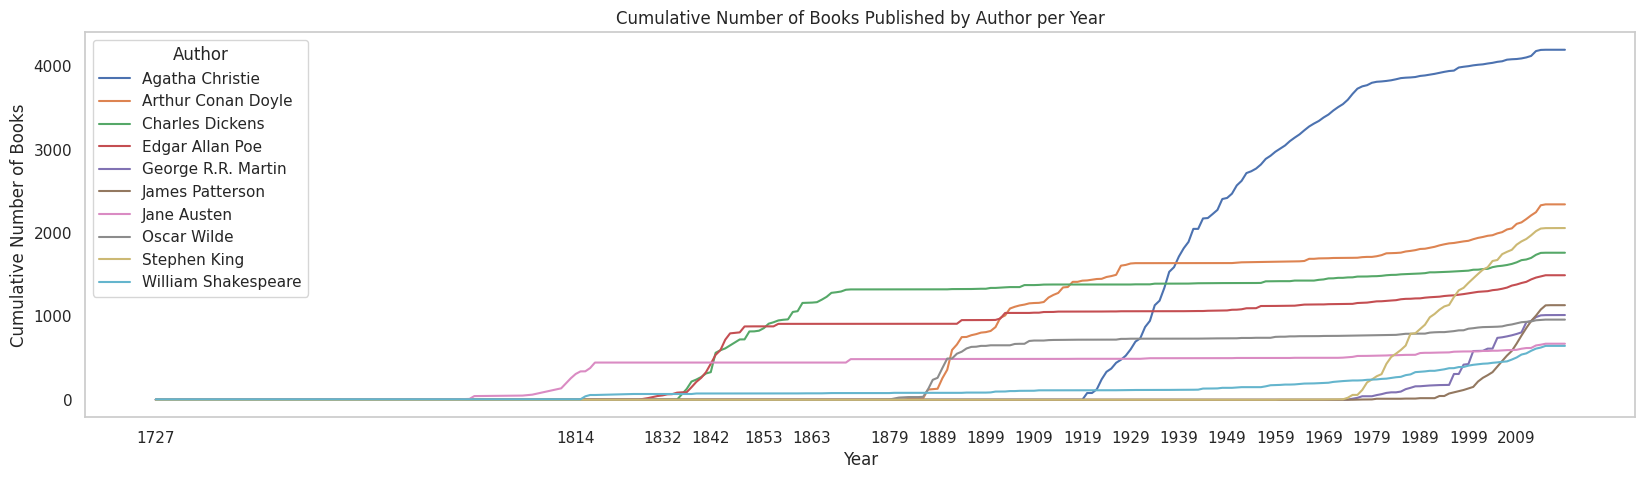

In [ ]:
# then we plot the cumulative counts for each author
cumulative_counts.plot(figsize=(20,5))
plt.title('Cumulative Number of Books Published by Author per Year')
plt.xlabel('Year')
plt.ylabel('Cumulative Number of Books')
plt.legend(title='Author')
plt.grid()
years = cumulative_counts.index
year_step = 10
years_to_display = years[::year_step]
plt.xticks(years_to_display)
plt.show()

**Comment:**

**Looking at the graph, we can infer that, not all of these top 10 popular authors are contemporary to each other. They were most productive in specific periods of time. For example, Charles Dickens was highly productive between 1832 and 1863. Edgar Allan Poe was also productive between 1832 and 1842. It implies that Charles Dickens and Edgar Allan Poe were contemporary to each other. Arthur Conan Doyle was productive from 1889 to 1919 and Oscar Wilde from 1880 to 1890 which implies they were contemporaries. Agatha Christie was productive between 1919 and 1969. Stephen King was productive from 1970 to 2000 and George RR Martin got productive between 1990 and 2009, both Stephen King and George RR Martin are contemporaries.**

##[RQ7] Estimating probabilities is a core skill for a data scientist: show us your best!

### 1. Estimate the probability that a book has over 30% of the ratings above 4.

In [ ]:
import json
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
booko= pd.read_json("lighter_books.json", nrows=10, lines= True)

In [ ]:
booko['rating_dist']

0    5:1674064|4:664833|3:231195|2:41699|1:16215|to...
1    5:4801606|4:1681521|3:623286|2:145898|1:125040...
2    5:1690166|4:781011|3:313727|2:54687|1:15453|to...
3    5:1994597|4:696545|3:212678|2:28915|1:13959|to...
4    5:1808039|4:663849|3:193604|2:27759|1:12425|to...
5        5:25063|4:4467|3:1103|2:227|1:282|total:31142
6        5:49438|4:6112|3:1525|2:354|1:534|total:57963
7        5:25063|4:4467|3:1103|2:227|1:282|total:31142
8    5:753962|4:436665|3:206876|2:60681|1:32955|tot...
9    5:167705|4:81013|3:32283|2:8665|1:4360|total:2...
Name: rating_dist, dtype: object

In [ ]:
def createcounter(x):
    listo= x.split("|") # make a list of the individual ratings
    my_dict= {}
    for s in listo:
        key, value = s.split(':') #split each rating into key and value(was string before)
        my_dict[key] = int(value)# make a dictionnary out of it
    countocount= 0
    if my_dict['4']/ my_dict['total']> 0.3:
        countocount+=1 #The books that have achieved more than 30% ratings above 4 will get marked with a 1, the others with a 0
    elif my_dict['5']/ my_dict['total']> 0.3:
        countocount+=1
    return countocount

In [ ]:
chunksize = 10**5
sicount=0  #Variable to count the number of books with more than 30% ratings above 4
universe = 0 #Variable to count the number of rated books in total
for chunk in pd.read_json("lighter_books.json", chunksize=chunksize,lines=True ):
    chunk = chunk[chunk["ratings_count"] > 0 ]#Includes only the rows in chunk, that have ratings
    universe += len(chunk) #number of rows that the chunk contains
    chunk["siono"] = chunk.apply(lambda row: createcounter(row["rating_dist"]), axis=1) #Calls the function createcounter for every single row in the chunk and stores the value 1 or in a new column 'siono'
    sicount += len(chunk[chunk["siono"] == 1 ]) # number of rows in the chunk, with more than 30% ratings above 4

print(sicount/universe) #probability that a book has over 30% of the ratings above 4

0.845217970229105


The probability that a book has over 30% of the ratings above 4 is 0.845217970229105

### Q2 Estimate the probability that an author publishes a new book within two years from its last work.

In [ ]:
#Estimate the probability that an author publishes a new book within two years from its last work.
# Assumptions:
#-If a book is published in a new format it is considered as new publication
#-Also a series of books is considered as new publication


In [ ]:
import json
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
from collections import defaultdict
from datetime import datetime
from statistics import mean


In [ ]:
booko2= pd.read_json("lighter_books.json", nrows=10, lines= True)
booko2

id                                              title  \
0   2  Harry Potter and the Order of the Phoenix (Har...   
1   3  Harry Potter and the Sorcerer's Stone (Harry P...   
2   4  Harry Potter and the Chamber of Secrets (Harry...   
3   5  Harry Potter and the Prisoner of Azkaban (Harr...   
4   6  Harry Potter and the Goblet of Fire (Harry Pot...   
5   7   The Harry Potter Collection (Harry Potter, #1-6)   
6   8  Harry Potter Boxed Set, Books 1-5 (Harry Potte...   
7  10       Harry Potter Collection (Harry Potter, #1-6)   
8  11  The Hitchhiker's Guide to the Galaxy (Hitchhik...   
9  12  The Ultimate Hitchhiker's Guide: Five Complete...   

                                             authors    author_name  \
0  [{'id': '1077326', 'name': 'J.K. Rowling', 'ro...   J.K. Rowling   
1  [{'id': '1077326', 'name': 'J.K. Rowling', 'ro...   J.K. Rowling   
2                                               None   J.K. Rowling   
3  [{'id': '1077326', 'name': 'J.K. Rowling', 'ro...   J.K. Rowling   
4  [{'id': '1077326', 'name': 'J.K. Rowling', 'ro...   J.K. Rowling   
5  [{'id': '1077326', 'name': 'J.K. Rowling', 'ro...   J.K. Rowling   
6  [{'id': '1077326', 'name': 'J.K. Rowling', 'ro...   J.K. Rowling   
7                                               None   J.K. Rowling   
8                                               None  Douglas Adams   
9                                               None  Douglas Adams   

   author_id   work_id        isbn         isbn13 asin language  \
0    1077326   2809203  0439358078  9780439358071           eng   
1    1077326   4640799                                      eng   
2    1077326   6231171  0439554896  9780439554893           eng   
3    1077326   2402163  043965548X  9780439655484           eng   
4    1077326   3046572                                      eng   
5    1077326  21457570  0439887453  9780439887458           eng   
6    1077326  21457576  0439682584  9780439682589           eng   
7    1077326  21457570  0439827604  9780439827607           eng   
8          4   3078186                                      eng   
9          4    135328  0517226952  9780517226957           eng   

   average_rating                                        rating_dist  \
0            4.50  5:1674064|4:664833|3:231195|2:41699|1:16215|to...   
1            4.48  5:4801606|4:1681521|3:623286|2:145898|1:125040...   
2            4.43  5:1690166|4:781011|3:313727|2:54687|1:15453|to...   
3            4.57  5:1994597|4:696545|3:212678|2:28915|1:13959|to...   
4            4.56  5:1808039|4:663849|3:193604|2:27759|1:12425|to...   
5            4.73      5:25063|4:4467|3:1103|2:227|1:282|total:31142   
6            4.79      5:49438|4:6112|3:1525|2:354|1:534|total:57963   
7            4.73      5:25063|4:4467|3:1103|2:227|1:282|total:31142   
8            4.22  5:753962|4:436665|3:206876|2:60681|1:32955|tot...   
9            4.36  5:167705|4:81013|3:32283|2:8665|1:4360|total:2...   

   ratings_count  text_reviews_count publication_date  \
0        2628006               44716          2004-09   
1        7377351              116930       2003-11-01   
2        2855044               55286       2003-11-01   
3        2946694               58023       2004-05-01   
4        2705676               48637       2002-09-28   
5          31142                 975       2006-09-01   
6          57963                 183       2004-09-13   
7          31142                 975       2005-09-12   
8        1491139               31417             2005   
9         294026                5429       2005-11-01   

  original_publication_date                 format  \
0                2003-06-21              Paperback   
1                1997-06-26              Hardcover   
2                1998-07-02              Hardcover   
3                1999-07-08  Mass Market Paperback   
4                2000-07-08              Paperback   
5                2005-01-01              Paperback   
6                2003-1

In [ ]:
grouped = booko2.groupby('author_id')['original_publication_date']
grouped
author_dict = grouped.apply(list).to_dict()
author_dict

{4: ['1979-10-12', '1996-01-17'],
 1077326: ['2003-06-21',
  '1997-06-26',
  '1998-07-02',
  '1999-07-08',
  '2000-07-08',
  '2005-01-01',
  '2003-10-01',
  '2005-01-01']}

In [ ]:
chunksize= 10**4
chunks=[]
for chunk in pd.read_json("lighter_books.json", chunksize=chunksize, lines=True):
    chunks.append(chunk[['author_id', 'original_publication_date']])
df = pd.concat(chunks, axis=0)
grouped = df.groupby('author_id')['original_publication_date'] #selects all the books with the same author and stores the original publication dates in a list
author_dict = grouped.apply(list).to_dict() # make a dictionnary out of it
authorslonger2= 0 #Count for authors that had longer than 2 years on average to publish a new book
authorsfaster2=0 ##Count for authors that were faster than 2 years on average to publish a new book
for author_id, original_publication_date in author_dict.items():
    try:
        original_publication_date = sorted([datetime.strptime(date, '%Y-%m-%d') for date in original_publication_date if date is not None]) #convert them to datetime objects
    except ValueError:
        continue # If the convertion can't be done the author is skipped
    differences = [] #  Variable to calculate the difference between the the publications of an author
    differences_auth=[] # Variable to calculate the average calculation time of the authors
    for i in range(len(original_publication_date)-1):
        try:
            difference = original_publication_date[i+1] - original_publication_date[i]
            differences.append(difference.total_seconds()/(3600*24*360))
        except TypeError: # If the calculation can't be done the author is skipped
            continue
    if differences: # Handling the exception of an empty list
        average_difference = mean(differences)
        if average_difference >= 2:
            authorslonger2 += 1
        if average_difference <= 2:
            authorsfaster2 += 1
    else:
        continue
prob_faster2= authorsfaster2/(authorslonger2+authorsfaster2)
print(prob_faster2)

0.8973156401944895


The probability that an author publishes a new book within two years from its last work is 0.8973156401944895

### Q3 In the file list.json, you will find a peculiar list named "The Worst Books of All Time." Estimate the probability of a book being included in this list, knowing it has more than 700 pages.

In [ ]:
import json
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
booko2= pd.read_json("lighter_books.json", nrows=10, lines= True)
booko2

id                                              title  \
0   2  Harry Potter and the Order of the Phoenix (Har...   
1   3  Harry Potter and the Sorcerer's Stone (Harry P...   
2   4  Harry Potter and the Chamber of Secrets (Harry...   
3   5  Harry Potter and the Prisoner of Azkaban (Harr...   
4   6  Harry Potter and the Goblet of Fire (Harry Pot...   
5   7   The Harry Potter Collection (Harry Potter, #1-6)   
6   8  Harry Potter Boxed Set, Books 1-5 (Harry Potte...   
7  10       Harry Potter Collection (Harry Potter, #1-6)   
8  11  The Hitchhiker's Guide to the Galaxy (Hitchhik...   
9  12  The Ultimate Hitchhiker's Guide: Five Complete...   

                                             authors    author_name  \
0  [{'id': '1077326', 'name': 'J.K. Rowling', 'ro...   J.K. Rowling   
1  [{'id': '1077326', 'name': 'J.K. Rowling', 'ro...   J.K. Rowling   
2                                               None   J.K. Rowling   
3  [{'id': '1077326', 'name': 'J.K. Rowling', 'ro...   J.K. Rowling   
4  [{'id': '1077326', 'name': 'J.K. Rowling', 'ro...   J.K. Rowling   
5  [{'id': '1077326', 'name': 'J.K. Rowling', 'ro...   J.K. Rowling   
6  [{'id': '1077326', 'name': 'J.K. Rowling', 'ro...   J.K. Rowling   
7                                               None   J.K. Rowling   
8                                               None  Douglas Adams   
9                                               None  Douglas Adams   

   author_id   work_id        isbn         isbn13 asin language  \
0    1077326   2809203  0439358078  9780439358071           eng   
1    1077326   4640799                                      eng   
2    1077326   6231171  0439554896  9780439554893           eng   
3    1077326   2402163  043965548X  9780439655484           eng   
4    1077326   3046572                                      eng   
5    1077326  21457570  0439887453  9780439887458           eng   
6    1077326  21457576  0439682584  9780439682589           eng   
7    1077326  21457570  0439827604  9780439827607           eng   
8          4   3078186                                      eng   
9          4    135328  0517226952  9780517226957           eng   

   average_rating                                        rating_dist  \
0            4.50  5:1674064|4:664833|3:231195|2:41699|1:16215|to...   
1            4.48  5:4801606|4:1681521|3:623286|2:145898|1:125040...   
2            4.43  5:1690166|4:781011|3:313727|2:54687|1:15453|to...   
3            4.57  5:1994597|4:696545|3:212678|2:28915|1:13959|to...   
4            4.56  5:1808039|4:663849|3:193604|2:27759|1:12425|to...   
5            4.73      5:25063|4:4467|3:1103|2:227|1:282|total:31142   
6            4.79      5:49438|4:6112|3:1525|2:354|1:534|total:57963   
7            4.73      5:25063|4:4467|3:1103|2:227|1:282|total:31142   
8            4.22  5:753962|4:436665|3:206876|2:60681|1:32955|tot...   
9            4.36  5:167705|4:81013|3:32283|2:8665|1:4360|total:2...   

   ratings_count  text_reviews_count publication_date  \
0        2628006               44716          2004-09   
1        7377351              116930       2003-11-01   
2        2855044               55286       2003-11-01   
3        2946694               58023       2004-05-01   
4        2705676               48637       2002-09-28   
5          31142                 975       2006-09-01   
6          57963                 183       2004-09-13   
7          31142                 975       2005-09-12   
8        1491139               31417             2005   
9         294026                5429       2005-11-01   

  original_publication_date                 format  \
0                2003-06-21              Paperback   
1                1997-06-26              Hardcover   
2                1998-07-02              Hardcover   
3                1999-07-08  Mass Market Paperback   
4                2000-07-08              Paperback   
5                2005-01-01              Paperback   
6                2003-1

In [ ]:
booko3=pd.read_json("list.json", nrows=10, lines=True)
booko3

id                                 title  \
0   2           The Worst Books of All Time   
1   3  Best Science Fiction & Fantasy Books   
2   4                    Best Books of 2008   
3   5       Best Books of the Decade: 2000s   
4   6        Best Books of the 20th Century   
5   7        Best Books of the 21st Century   
6   8                   Thickest Books Ever   
7   9       Best Books of the Decade: 1980s   
8  10      Best books for an African Safari   
9  11            Best Crime & Mystery Books   

                                         description  \
0  What do you think are the worst books ever wri...   
1  Anything in the science fiction or fantasy gen...   
2  The best books first published during 2008.See...   
3  The best books published during the 2000s deca...   
4  The best books published during the 20th centu...   
5  The best books published during the 21st centu...   
6  Original novel, not omnibus editions.500 pages...   
7  The best books published during the 1980s deca...   
8  Best books to read on an African Safari. Books...   
9  The best of crime and mystery books.If the boo...   

                                    description_html  num_pages  num_books  \
0  \n      What do you think are the worst books ...         74       7395   
1  \n      Anything in the science fiction or fan...         71       7023   
2  \n      The best books first published during ...         17       1678   
3  \n      The best books published during the 20...         70       6919   
4  \n      The best books published during the 20...         76       7600   
5  \n      The best books published during the 21...         91       9032   
6  \n      Original novel, not omnibus editions.<...          9        862   
7  \n      The best books published during the 19...         21       2059   
8  \n      Best books to read on an African Safar...          5        445   
9  \n      The best of crime and mystery books.<b...         62       6112   

   num_voters     created_date  \
0       18260   May 20th, 2008   
1       21747   May 29th, 2008   
2        6939   May 29th, 2008   
3       28249   May 29th, 2008   
4       49437   May 29th, 2008   
5       21393   May 29th, 2008   
6        2602   June 4th, 2008   
7        2323   June 6th, 2008   
8         705   June 9th, 2008   
9       14241  June 10th, 2008   

                                                tags  num_likes  \
0  [abominable, abomination, awful, bad, disgusti...        175   
1  [best-fantasy, best-science-fiction, earliest-...       2989   
2  [2008, best, by-year, earliest-list, fiction, ...         59   
3  [2000, 2001, 2002, 2003, 2004, 2005, 2006, 200...       1192   
4  [20th, 20th-century, best, by-century, by-year...       6083   
5  [2001, 2002, 2003, 2004, 2005, 2006, 2007, 200...       2024   
6  [500-pages, 500-pages-plus, big-books, earlies...        118   
7  [1980, 1980s, 1981, 1982, 1983, 1984, 1985, 19...        240   
8  [africa, african, earliest-list, location, saf...        103   
9              [best, crime, crime-mystery, mystery]       1827   

                                created_by  num_comments  \
0  {'name': 'Michael Economy', 'id': '73'}          2570   
1       {'name': 'deleted user', 'id': ''}           307   
2       {'name': 'deleted user', 'id': ''}           181   
3       {'name': 'deleted user', 'id': ''}           163   
4       {'name': 'deleted user', 'id': ''}           510   
5       {'name': 'deleted user', 'id': ''}           280   
6  {'name': 'Michael Economy', 'id': '73'}           104   
7       {'name': 'deleted user', 'id': ''}            41   
8       {'name': 'deleted user', 'id': ''}             9   
9       {'name': 'deleted user', 'id': ''}           138   

                                               books  
0  [{'book_id': '41865', 'title': 'Twilight', 'au...  
1  [{'book_id': '375802', 'title': 'Ender's Game'...  
2  [{'book_id': '2767052', 'title': 'The Hunger G...  
3  [{'book_id':

In [ ]:
value2 = booko3.loc[0, 'books']
value2

[{'book_id': '41865',
  'title': 'Twilight',
  'author_id': '941441',
  'author': 'Stephenie Meyer',
  'position': {'ranking': 1, 'score': 527144, 'votes': 5303}},
 {'book_id': '1162543',
  'title': 'Breaking Dawn',
  'author_id': '941441',
  'author': 'Stephenie Meyer',
  'position': {'ranking': 2, 'score': 400813, 'votes': 4061}},
 {'book_id': '49041',
  'title': 'New Moon',
  'author_id': '941441',
  'author': 'Stephenie Meyer',
  'position': {'ranking': 3, 'score': 356742, 'votes': 3648}},
 {'book_id': '428263',
  'title': 'Eclipse',
  'author_id': '941441',
  'author': 'Stephenie Meyer',
  'position': {'ranking': 4, 'score': 323657, 'votes': 3338}},
 {'book_id': '10818853',
  'title': 'Fifty Shades of Grey',
  'author_id': '4725841',
  'author': 'E.L. James',
  'position': {'ranking': 5, 'score': 231106, 'votes': 2356}},
 {'book_id': '6263078',
  'title': 'Miles to Go',
  'author_id': '990148',
  'author': 'Miley Cyrus',
  'position': {'ranking': 6, 'score': 175882, 'votes': 1799}

In [ ]:
def check_book_id(book_id):
    return 1 if book_id in int_book_ids else 0

In [ ]:
value2 = booko3.loc[0, 'books']#extract the column books from the row worst books of all time
chunksize= 10**4
chunks=[]

for chunk in pd.read_json("lighter_books.json", chunksize=chunksize, lines=True):
    chunk['id'] = pd.to_numeric(chunk['id'])
    chunk['num_pages'] = pd.to_numeric(chunk['num_pages'])
    chunk = chunk.dropna(subset=['id', 'num_pages'])#drop rows, that contain an empty string either for 'id' or 'num_pages'
    chunks.append(chunk[['id', 'num_pages']])#Only keep the columns 'id' and 'num_pages'
df = pd.concat(chunks, axis=0)#create a new dataframe only containig the stuff that was kept from the chunks
book_ids = [d['book_id'] for d in value2]#Make a list of the book_ids
int_book_ids = list(map(int, book_ids))# make integers of the book_ids
df['sino'] = df['id'].apply(check_book_id)#call the function check_book_id on every element of the list and store either 1 or 0 in a new column 'sino'
filtered_df = df[df['num_pages'] > 700] # Select only the books with more than 700 pages
filtered_df2 = df[(df['num_pages'] > 700) & (df['sino'] == 1)]# select the books with more than 700 pages and are contained in the 'worst books of all time' list
prob= len(filtered_df2)/len(filtered_df)
print(prob)

0.0019798416126709864


The probability of a book being included in this list, knowing it has more than 700 pages is 0.0019798416126709864

### Q4 Are the events X=’Being Included in The Worst Books of All Time list’ and Y=’Having more than 700 pages’ independent? Explain how you have obtained your answer.

In [ ]:
#Are the events X=’Being Included in The Worst Books of All Time list’ and Y=’Having more than 700 pages’ independent? Explain how you have obtained your answer.
# We will do a chi- square test on idependence to check whether they are independent or not

In [ ]:
import json
import pandas as pd
import scipy.stats as stats
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
booko2= pd.read_json("lighter_books.json", nrows=10, lines= True)
booko3=pd.read_json("list.json", nrows=10, lines=True)

In [ ]:
#var1= Being included in the Worst Books of All Time list, ##code extracted from 7.3
value2 = booko3.loc[0, 'books']
def check_book_id(book_id):
    return 1 if book_id in int_book_ids else 0
chunksize= 10**4
chunks=[]

for chunk in pd.read_json("lighter_books.json", chunksize=chunksize, lines=True):
    chunk['id'] = pd.to_numeric(chunk['id'])
    chunk['num_pages'] = pd.to_numeric(chunk['num_pages'])
    chunk = chunk.dropna(subset=['id', 'num_pages'])
    chunks.append(chunk[['id', 'num_pages']])
df = pd.concat(chunks, axis=0)
book_ids = [d['book_id'] for d in value2]
int_book_ids = list(map(int, book_ids))
df['sino'] = df['id'].apply(check_book_id)

In [ ]:
#var2= Having more than 700 pages
def check_700(num_pages):
    return 1 if num_pages>700 else 0
df['si700'] = df['num_pages'].apply(check_700)# calls function for every row on the column 'num_pages' and stores either 0 or one in the new column 'si700'

In [ ]:
contingency_table = pd.crosstab(df['sino'], df['si700'])

In [ ]:
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

In [ ]:
print(p)

3.092149285282895e-06



**As the p value is smaller than 0.05 we can conclude that the two variables are not independent**


##[RQ8] Charts, statistical tests, and analysis methods are splendid tools to illustrate your data-driven decisions to check whether a hypothesis is correct.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/HW2

Mounted at /content/drive
/content/drive/MyDrive/HW2


In [ ]:
import json
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import numpy as np

In [ ]:
authors_set = 'lighter_authors.json'
books_set = 'lighter_books.json'

In [ ]:
chunk_size = 80000
# Initializing an empty list to store chunks
books = pd.DataFrame()
# Looping through each chunk and append it to the result dataframe
for chunk in pd.read_json(books_set, lines=True, chunksize=chunk_size):
    selected_chunk = chunk[['average_rating','num_pages','language']]
    # Appending the selected chunk to the list
    books = pd.concat([books, selected_chunk], ignore_index=True)

To solve the question, we loaded the books dataset with the specific columns of interest and we will do data cleaning over those columns in the next cells:

### Q1 Can you demonstrate that readers usually rate the longest books as the worst?

In [ ]:
books['num_pages'] = pd.to_numeric(books['num_pages'], errors='coerce')

In [ ]:
books=books[books['average_rating'] != '']
books=books[books['num_pages']!='']

In [ ]:
books.dropna(subset='num_pages',inplace=True)

In [ ]:
books.dropna(subset='average_rating',inplace=True)

In [ ]:
max(books['num_pages'])

2147483647.0

As we can see maximum number of pages is too high, we will employ the quantile method to discard enormously large number of pages.

In [ ]:
max_pages= np.quantile(books["num_pages"], q = 0.999)

In [ ]:
min(books['num_pages'])

0.0

We are similarly using quantile to discard very low number of pages. A zero page book does not make sense.

In [ ]:
min_pages=np.quantile(books["num_pages"], q = 0.2)

In [ ]:
filtered_books=books[(books["num_pages"]>=min_pages) & (books["num_pages"]<=max_pages)]

In [ ]:
correlation = filtered_books['average_rating'].corr(filtered_books['num_pages'])
print(correlation)

0.07579438770675485


We observe a positive correlation between Number of Pages and Average Rating.

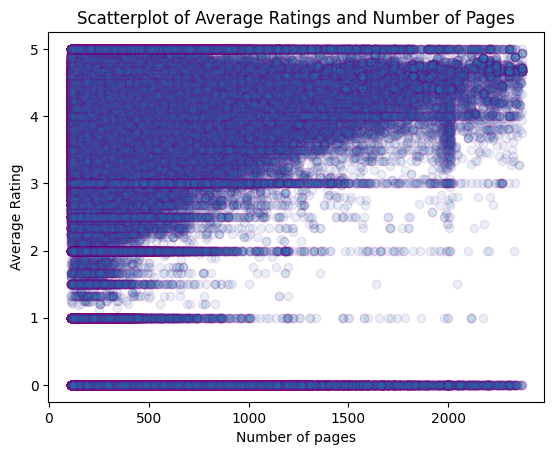

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(filtered_books["num_pages"], filtered_books["average_rating"], alpha=0.1, edgecolors = 'purple')
plt.title("Scatterplot of Average Ratings and Number of Pages")
plt.xlabel("Number of pages")
plt.ylabel("Average Rating")
plt.show()

The positive correlation is clearly visible in the above scatter plot, it implies that, as the number of page increases, average rating also increases. In other words, readers seem to rate longer books higher, in that case, the result is quite opposite to the belief in the question that wanted us to demonstrate a negative correlation.

### Q2 Compare the average rate distribution for English and non-English books with a proper statistical procedure. What can you conclude about those two groups?

In [ ]:
from scipy.stats import ttest_ind

In [ ]:
books=books[books['language'] != '']

In [ ]:
books.dropna(subset='language',inplace=True)

In [ ]:
#Creting a new column that is 1 for english books and 0 for nonenglish books
books['is_english']= books['language'].apply(lambda x: int( x[:3] in ["en","eng","en-","en-US", "en_GB", "eng"]))

In [ ]:
books['is_english'].value_counts()

1    926039
0    890798
Name: is_english, dtype: int64

In [ ]:
#Create groups for t-test and doing t-test
english_books= books[books['is_english'] ==1]
non_english_books= books[books['is_english'] ==0]

In [ ]:
import random
ratingsForEng = random.sample(english_books["average_rating"].tolist(), 1000)
ratingsForNonEng = random.sample(non_english_books["average_rating"].tolist(), 1000)
print(np.var(ratingsForEng))
print(np.var(ratingsForNonEng))

0.6492805899999999
0.6629983116


Since the t-test is done on smaller samples of data, we are sampling the data with random samples and we observe they have very similar variances, hence, in the t-test, we do it on equal variance:

In [ ]:
t_stat, p_val = ttest_ind(ratingsForEng, ratingsForNonEng,equal_var=True)
print("Value of the t statistics:", t_stat, "The p-value: ", p_val)

Value of the t statistics: 1.0672253591751661 The p-value:  0.2859990170375133


Since the p-value (0.286) is greater than the significance level=0.05, we do not have enough evidence to reject the null hypothesis. The null hypothesis typically states that there is no significant difference between the average rate distribution of English and Non-English Books.

The t-statistic of 1.07, while indicating some difference between the groups, is not strong enough evidence to overcome the relatively high p-value. This suggests that the observed difference may not be statistically significant.

**To further illustrate this we also plotted the average rate distribution for english and nonenglish books in histograms:**

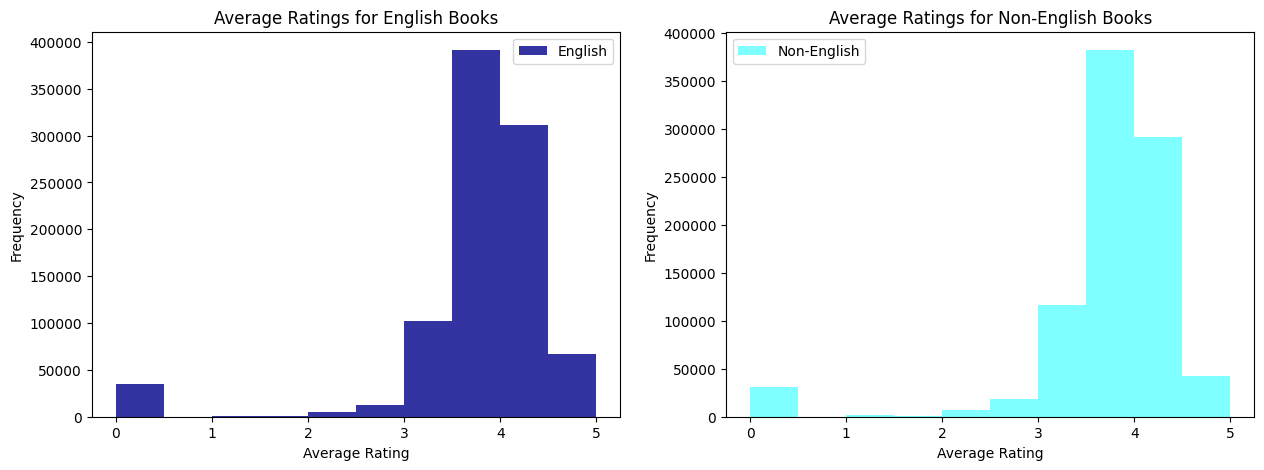

In [ ]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)  # Subplot with 1 row, 2 columns, first plot
plt.hist(english_books['average_rating'], alpha=0.8, label='English', color='darkblue')
plt.title('Average Ratings for English Books')
plt.xlabel('Average Rating')
plt.ylabel('Frequency')
plt.legend()
plt.subplot(1, 2, 2)  # Subplot with 1 row, 2 columns, second plot
plt.hist(non_english_books['average_rating'], alpha=0.5, label='Non-English', color='cyan')
plt.title('Average Ratings for Non-English Books')
plt.xlabel('Average Rating')
plt.ylabel('Frequency')
plt.legend()


**Conclusion**:

The two Histograms illustrate that there is no significant difference in the average rate distribution of english and non-english books

###Q3 About the two groups in the previous question, extract helpful statistics like mode, mean, median, and quartiles, explaining their role in a box plot.

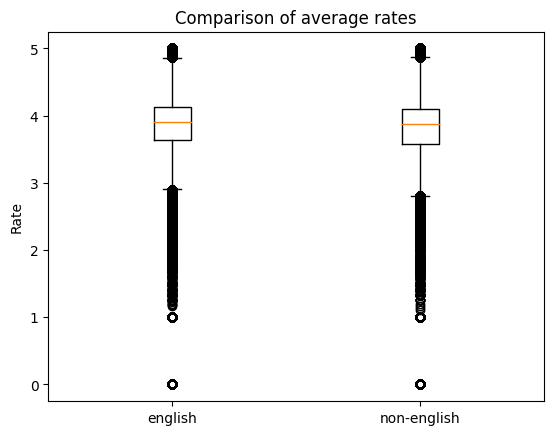

In [ ]:
#Defining variables for the boxplot
ratings_english = english_books['average_rating'].tolist()
ratings_non_english = non_english_books['average_rating'].tolist()
#Creating the boxplot
plt.boxplot([ratings_english, ratings_non_english], labels=['english', 'non-english'])
plt.title('Comparison of average rates')
plt.ylabel('Rate')
plt.show()

In [ ]:
#Calculating the means
mean_english = english_books['average_rating'].mean()
mean_non_english = non_english_books['average_rating'].mean()
print('Mean english books: %.3f' % mean_english)
print('Mean non-english books: %.3f' % mean_non_english)

Mean english books: 3.753
Mean non-english books: 3.707


The two means are really close to each other. The mean isn't shown in a boxplot. If the data is perfectly symmetric, the mean is identical with the median.

In [ ]:
#Calculating the median
median_english = english_books['average_rating'].median()
median_non_english = non_english_books['average_rating'].median()
print('Median english books: %.3f' % median_english)
print('Median non-english books: %.3f' % median_non_english)

Median english books: 3.900
Median non-english books: 3.870


The medians of english and non-english books are really close to each other. The median is the yellow line in the boxplot. Half of the average rates are above the line and half below it. In a boxplot the median is important to show the skewness of the data. As the median for both english and non-english books is more or less in the middle of the box, we can conclude that are data is symmetric.

In [ ]:
#Calculating the mode
mode_english = english_books['average_rating'].mode()
mode_non_english = non_english_books['average_rating'].mode()
print('Mode english books: %.3f' % mode_english)
print('Mode non-english books: %.3f' % mode_non_english)

Mode english books: 4.000
Mode non-english books: 4.000


In [ ]:
#Calculating the quartiles
q1_english = english_books['average_rating'].quantile(0.25)
q2_english = english_books['average_rating'].quantile(0.5)
q3_english = english_books['average_rating'].quantile(0.75)

q1_non_english = non_english_books['average_rating'].quantile(0.25)
q2_non_english = non_english_books['average_rating'].quantile(0.5)
q3_non_english = non_english_books['average_rating'].quantile(0.75)

print('Q1 english books: %.3f' % q1_english)
print('Q2 english books: %.3f' % q2_english)
print('Q3 english books: %.3f' % q3_english)
print('Q1 non-english books: %.3f' % q1_non_english)
print('Q2 non-english books: %.3f' % q2_non_english)
print('Q3 non-english books: %.3f' % q3_non_english)

Q1 english books: 3.640
Q2 english books: 3.900
Q3 english books: 4.130
Q1 non-english books: 3.580
Q2 non-english books: 3.870
Q3 non-english books: 4.100


For both english and non-english books, the interquartile range(Q3-Q1) is quite small. This means that our data isn't really dispersed. The interqaurtile range is visualized by the length of the boxplot.

###Q4 It seems reasonable to assume that authors with more fans should have more reviews, but maybe their fans are a bit lazy. Confirm or reject this with a convenient statistical test or a predictive model.

In [ ]:
from scipy.stats import pearsonr

In [ ]:
chunksize=10**4
chunks=[]

#chunking and data cleaning
for chunk in pd.read_json("lighter_authors.json", chunksize=chunksize, lines=True):
    chunk = chunk[['fans_count', 'text_reviews_count']]
    chunk['text_reviews_count'].replace('', np.nan, inplace=True)
    chunk['fans_count'].replace('', np.nan, inplace=True)
    chunk.dropna(subset=['text_reviews_count'], inplace=True)
    chunk.dropna(subset=['fans_count'], inplace=True)
    chunk['text_reviews_count']= pd.to_numeric(chunk['text_reviews_count'])
    chunk['fans_count']= pd.to_numeric(chunk['fans_count'])
    chunks.append(chunk)

#Creating a new dataframe
chunks = pd.concat(chunks, axis=0)

In [ ]:
print(max(chunks['fans_count']))
print(max(chunks['text_reviews_count']))

766035
608956


In [ ]:
print(min(chunks['fans_count']))
print(min(chunks['text_reviews_count']))

-33
0


In [ ]:
chunks=chunks[chunks['fans_count']>=0]

Since the maximum of the fans_count and text_reviews_count is too high, we can consider till the 99th Percentile of the values and do our statistical test on the filtered dataset.

In [ ]:
fans_max = np.quantile(chunks["fans_count"], q = 0.99) #considering the 99th Percentile
textreviews_max = np.quantile(chunks["text_reviews_count"], q = 0.99) #considering the 99th Percentile

In [ ]:
filtered_authors= chunks[(chunks["fans_count"] <= fans_max) & (chunks["text_reviews_count"] <= textreviews_max)]

In [ ]:
#Creating variables for the Pearsons Correlation
fans = filtered_authors['fans_count']
reviews = filtered_authors['text_reviews_count']

#Calculating the Pearsons Correlation
correlation, _ = pearsonr(fans, reviews)
print('Pearsons correlation: %.3f' % correlation)

Pearsons correlation: 0.703


The coefficient of 0.703 indicates a positive correlation. The more fans the author has, the more reviews the author gets.

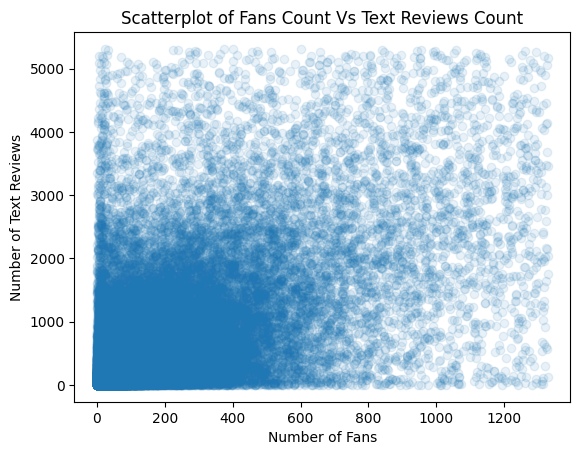

In [ ]:
plt.scatter(filtered_authors["fans_count"], filtered_authors["text_reviews_count"], alpha=0.1)
plt.title("Scatterplot of Fans Count Vs Text Reviews Count")
plt.xlabel("Number of Fans")
plt.ylabel("Number of Text Reviews")
plt.show()

There is a strong relationship between the number of fans and number of text reviews according to the Pearson Correlation value of 0.703 which is close to +1.

In [ ]:
popular_authors= filtered_authors.nlargest(1000,'fans_count') #we are taking 1000 most popular authors

In [ ]:
less_popular_authors=filtered_authors.nsmallest(1000,'fans_count') #we are taking 1000 authors with lowest fans count

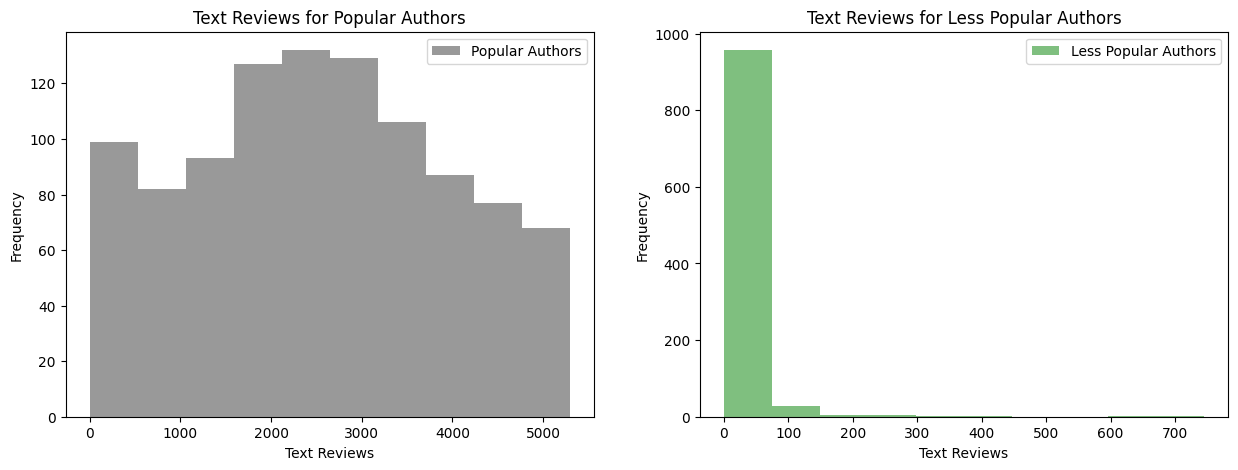

In [ ]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)  # Subplot with 1 row, 2 columns, first plot
plt.hist(popular_authors['text_reviews_count'], alpha=0.8, label='Popular Authors', color='gray')
plt.title('Text Reviews for Popular Authors')
plt.xlabel('Text Reviews')
plt.ylabel('Frequency')
plt.legend()
plt.subplot(1, 2, 2)  # Subplot with 1 row, 2 columns, second plot
plt.hist(less_popular_authors['text_reviews_count'], alpha=0.5, label='Less Popular Authors', color='green')
plt.title('Text Reviews for Less Popular Authors')
plt.xlabel('Text Reviews')
plt.ylabel('Frequency')
plt.legend()

As the histogram shows, the popular authors have got more text reviews compared to the less popular authors.

###Q5 Provide a short survey about helpful statistical tests in data analysis and mining: focus on hypothesis design and the difference between parametric and nonparametric tests, explaining the reasons behind the choice of one of these two tests.

In data analysis and mining, statistical tests are essential tools for drawing conclusions from data. These tests help researchers and analysts make informed decisions based on evidence.
Hypothesis testing is usually done by formulating a null hypothesis, which states that there either is a certain relationship between variables or not. In a second step the prediction of the hypothesis is tested by observing data, which leads to a rejection or acceptance of the null hypothesis. The tests used for hypothesis testing can be divded in two groups: Parametric and nonparametric tests. The main difference between these kind of tests is that parametric tests make certain assumptions about the data (e.g. normally distributed, same variance, sampled randomly), while nonparametric tests don't do that and are more factual. Further for parametric tests the sample size needs to be bigger. We chose parametric tests as they can be computed and interpreted easier than nonparametric tests and we didn't see any of the assumptions about the data as violated.

**Hypothesis Design**:
- Hypothesis testing is a fundamental process in data analysis. It involves formulating two competing hypotheses: the null hypothesis (H0), which typically represents the status quo or no effect, and the alternative hypothesis (H1), which represents the effect or relationship you want to test.

**Parametric vs. Nonparametric Tests**:
- **Parametric Tests**:
  - Parametric tests assume that data follows a specific probability distribution, usually the normal distribution. They make certain assumptions about the data's characteristics, such as equal variances and normally distributed residuals.
  - Examples of parametric tests include t-tests, ANOVA, and linear regression.
  - **Reasons for Choosing Parametric Tests**:
    - When data follows a normal distribution or is approximately normal, parametric tests tend to be more powerful, providing more accurate and precise results.
    - Parametric tests can estimate population parameters, making them suitable for inferential statistics.

- **Nonparametric Tests**:
  - Nonparametric tests, on the other hand, do not rely on specific data distribution assumptions. They are also known as distribution-free tests.
  - Examples of nonparametric tests include the Mann-Whitney U test, Kruskal-Wallis test, and Wilcoxon signed-rank test.
  - **Reasons for Choosing Nonparametric Tests**:
    - When data violates the assumptions of parametric tests, such as when it is not normally distributed or contains outliers, nonparametric tests can be more robust and appropriate.
    - Nonparametric tests are ideal for data on ordinal or nominal scales where calculating means and variances isn't meaningful.

**Choosing the Right Test**:
-  Key considerations include:
  - Data distribution: If the data is normally distributed, parametric tests are often preferred. For non-normally distributed data, nonparametric tests are more suitable.
  - Assumption violations: When assumptions like homogeneity of variances or normality are not met, nonparametric tests are a safer choice.
  - Research question: Consider the specific hypotheses you want to test and the nature of your data when selecting a test type.

In summary, hypothesis design and the choice between parametric and nonparametric tests are critical steps in data analysis and mining. Careful consideration of the data's characteristics and the research objectives will lead to more accurate and meaningful results. Both parametric and nonparametric tests have their strengths, and the choice between them should be guided by the properties of the data and the goals of the analysis.

##Bonus Question

###Question 1.1

Select one alternative library to Pandas (i.e., Dask, Polar, Vaex, Datatable, etc.), upload authors.json dataset, and filter authors with at least 100 reviews. Do the same using Pandas and compare performance in terms of milliseconds.

In [ ]:
# Load data using Pandas
start_time = time.time()
pandas_df = pd.read_json(authors_set, lines=True)


# Filter authors with at least 100 reviews
author_counts = pandas_df['name'].value_counts()
authors_with_100_reviews = author_counts[author_counts >= 100].index
filtered_pandas = pandas_df[pandas_df['name'].isin(authors_with_100_reviews)]

pandas_time = (time.time() - start_time) * 1000  # Convert to milliseconds

print("Pandas time (ms):", pandas_time)


Pandas time (ms): 24993.821382522583


In [ ]:
import dask.dataframe as dd
import dask

# Load data using Dask
start_time = time.time()
dask_df = dd.read_json(authors_set,lines=True)

# Filter authors with at least 100 reviews
author_counts = dask_df['name'].value_counts()
authors_with_100_reviews = author_counts[author_counts >= 100].compute()
filtered_dask = dask_df[dask_df['name'].isin(authors_with_100_reviews)]

dask_time = (time.time() - start_time) * 1000  # Convert to milliseconds

print("Dask time (ms):", dask_time)


Dask time (ms): 36796.88239097595


As we can see that implementing the task with pandas takes less time than its alternative called DASK. The direct implementation same as pandas gives the above result, though the dask provides the distributed computing services so as to divide the work into number of workers , the later might work effectively interms of time complexity.

##Command Line Question:

###Command Line Original Script:

In [ ]:
#!/bin/bash
echo "id|title|total_books_count"
cat series.json | jq -r '. as $parent | .works[] | [$parent.id, $parent.title, .books_count] | join("|")' | awk -F'|' '{a[$1"|"$2]+=$3} END{for (i in a) print i"| "a[i]}' | sort -t'|' -k3nr | head -5

###Output of Original Script:
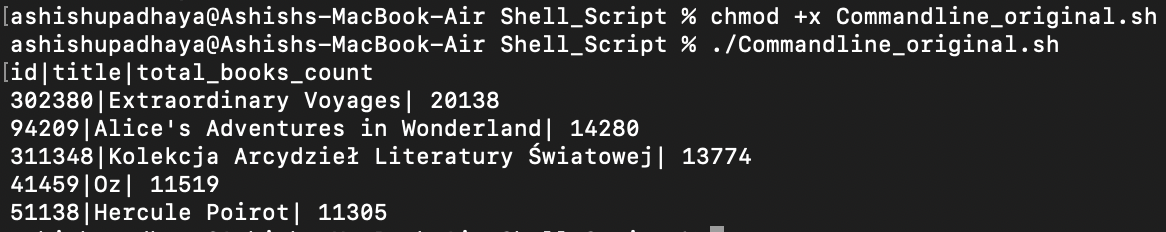

###Command Line LLM Script:

In [ ]:
#!/bin/bash
echo "id|title|total_books_count"
jq -r '. as $parent | .works[] | [$parent.id, $parent.title, .books_count] | join("|")' series.json | awk -F'|' '{a[$1"|"$2]+=$3} END{for (i in a) print i"| "a[i]}' | sort -t'|' -k3nr | head -5

###Output of LLM Script:
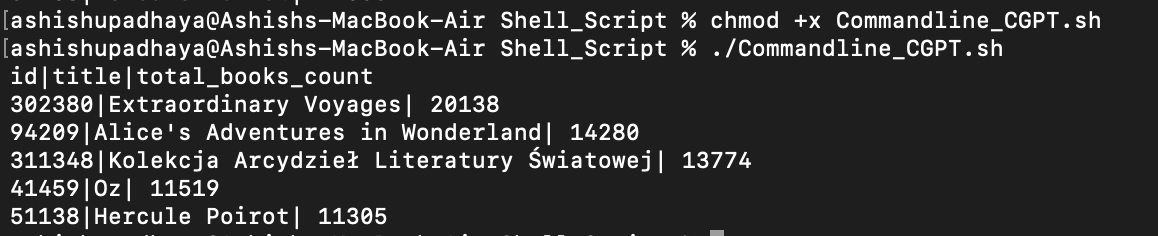

##AWS Question

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/HW2

Mounted at /content/drive
/content/drive/MyDrive/HW2


In [ ]:
import pandas as pd
import time
#we store the start time of the script.
start_time= time.time()
#we initialise an empty list
tags_list = []
# we take a chunk size
chunk_size = 20000
# we initialize an empty list to store chunks
lists = pd.DataFrame()
# We Loop through each chunk and append it to the result dataframe
with open('list.json', 'r') as lists_set:
  for chunk in pd.read_json(lists_set, lines=True, chunksize=chunk_size):
        # We have to Flatten the lists of tags and extend the tags_list
        for tags in chunk['tags']:
            if isinstance(tags, list):
                tags_list.extend(tags)
tags_df = pd.DataFrame({'tags': tags_list})
tags_df.dropna(inplace=True)
# We now will count the usage of each tag
tag_counts = tags_df['tags'].value_counts().reset_index()
tag_counts.columns = ['tag', '#usage']
# We will Sort the DataFrame by usage count in descending order
sorted_tags = tag_counts.sort_values(by='#usage', ascending=False)

end_time= time.time()
# then we print the top tags and time taken
print(sorted_tags.head(5))
print(f"Time taken: {end_time - start_time:.2f} seconds")

               tag  #usage
0          romance    6001
1          fiction    5291
2      young-adult    5016
3          fantasy    3666
4  science-fiction    2779
Time taken: 74.91 seconds


I have used this as a script file in the name of aws_solution.py and have run the script from the command line. This is the attached screenshot below:
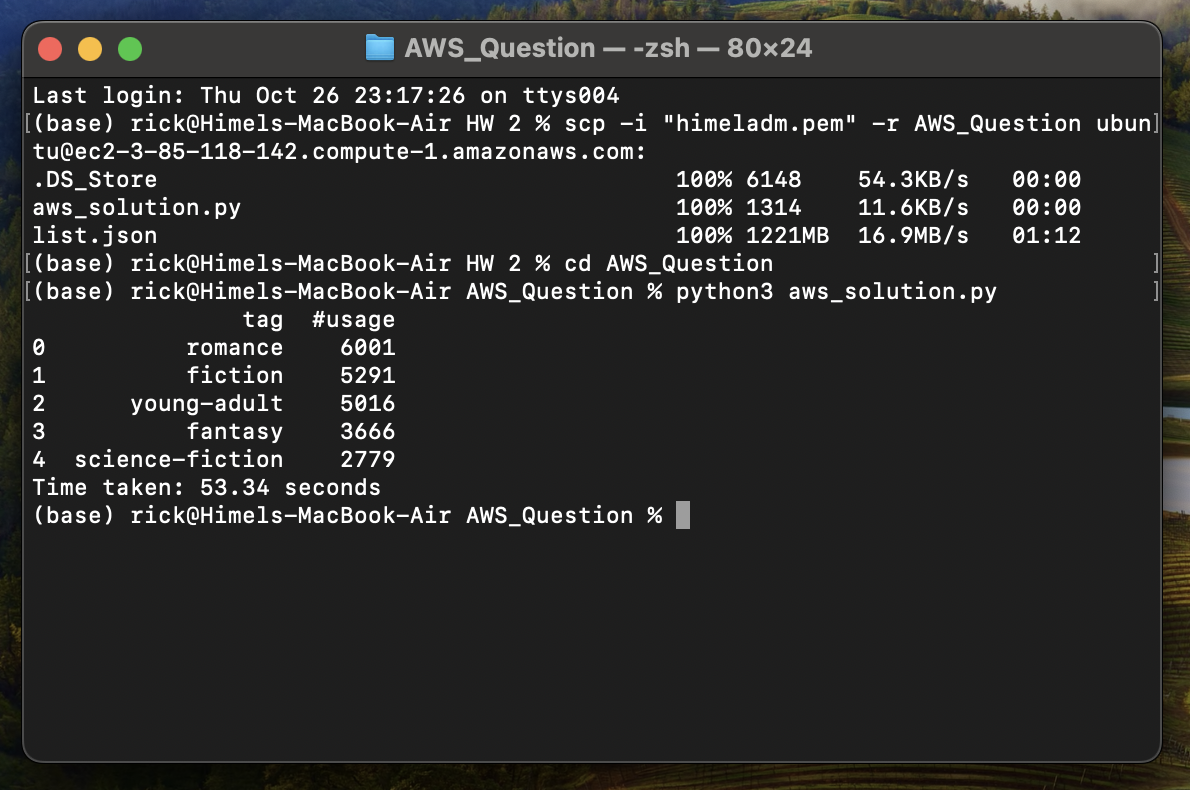

As evident from the screenshot, the result came as expected and took 53.34 seconds in my own macbook.

Then I have created an AWS EC2 instance with the following specifications:

t3.large, volume=30giB
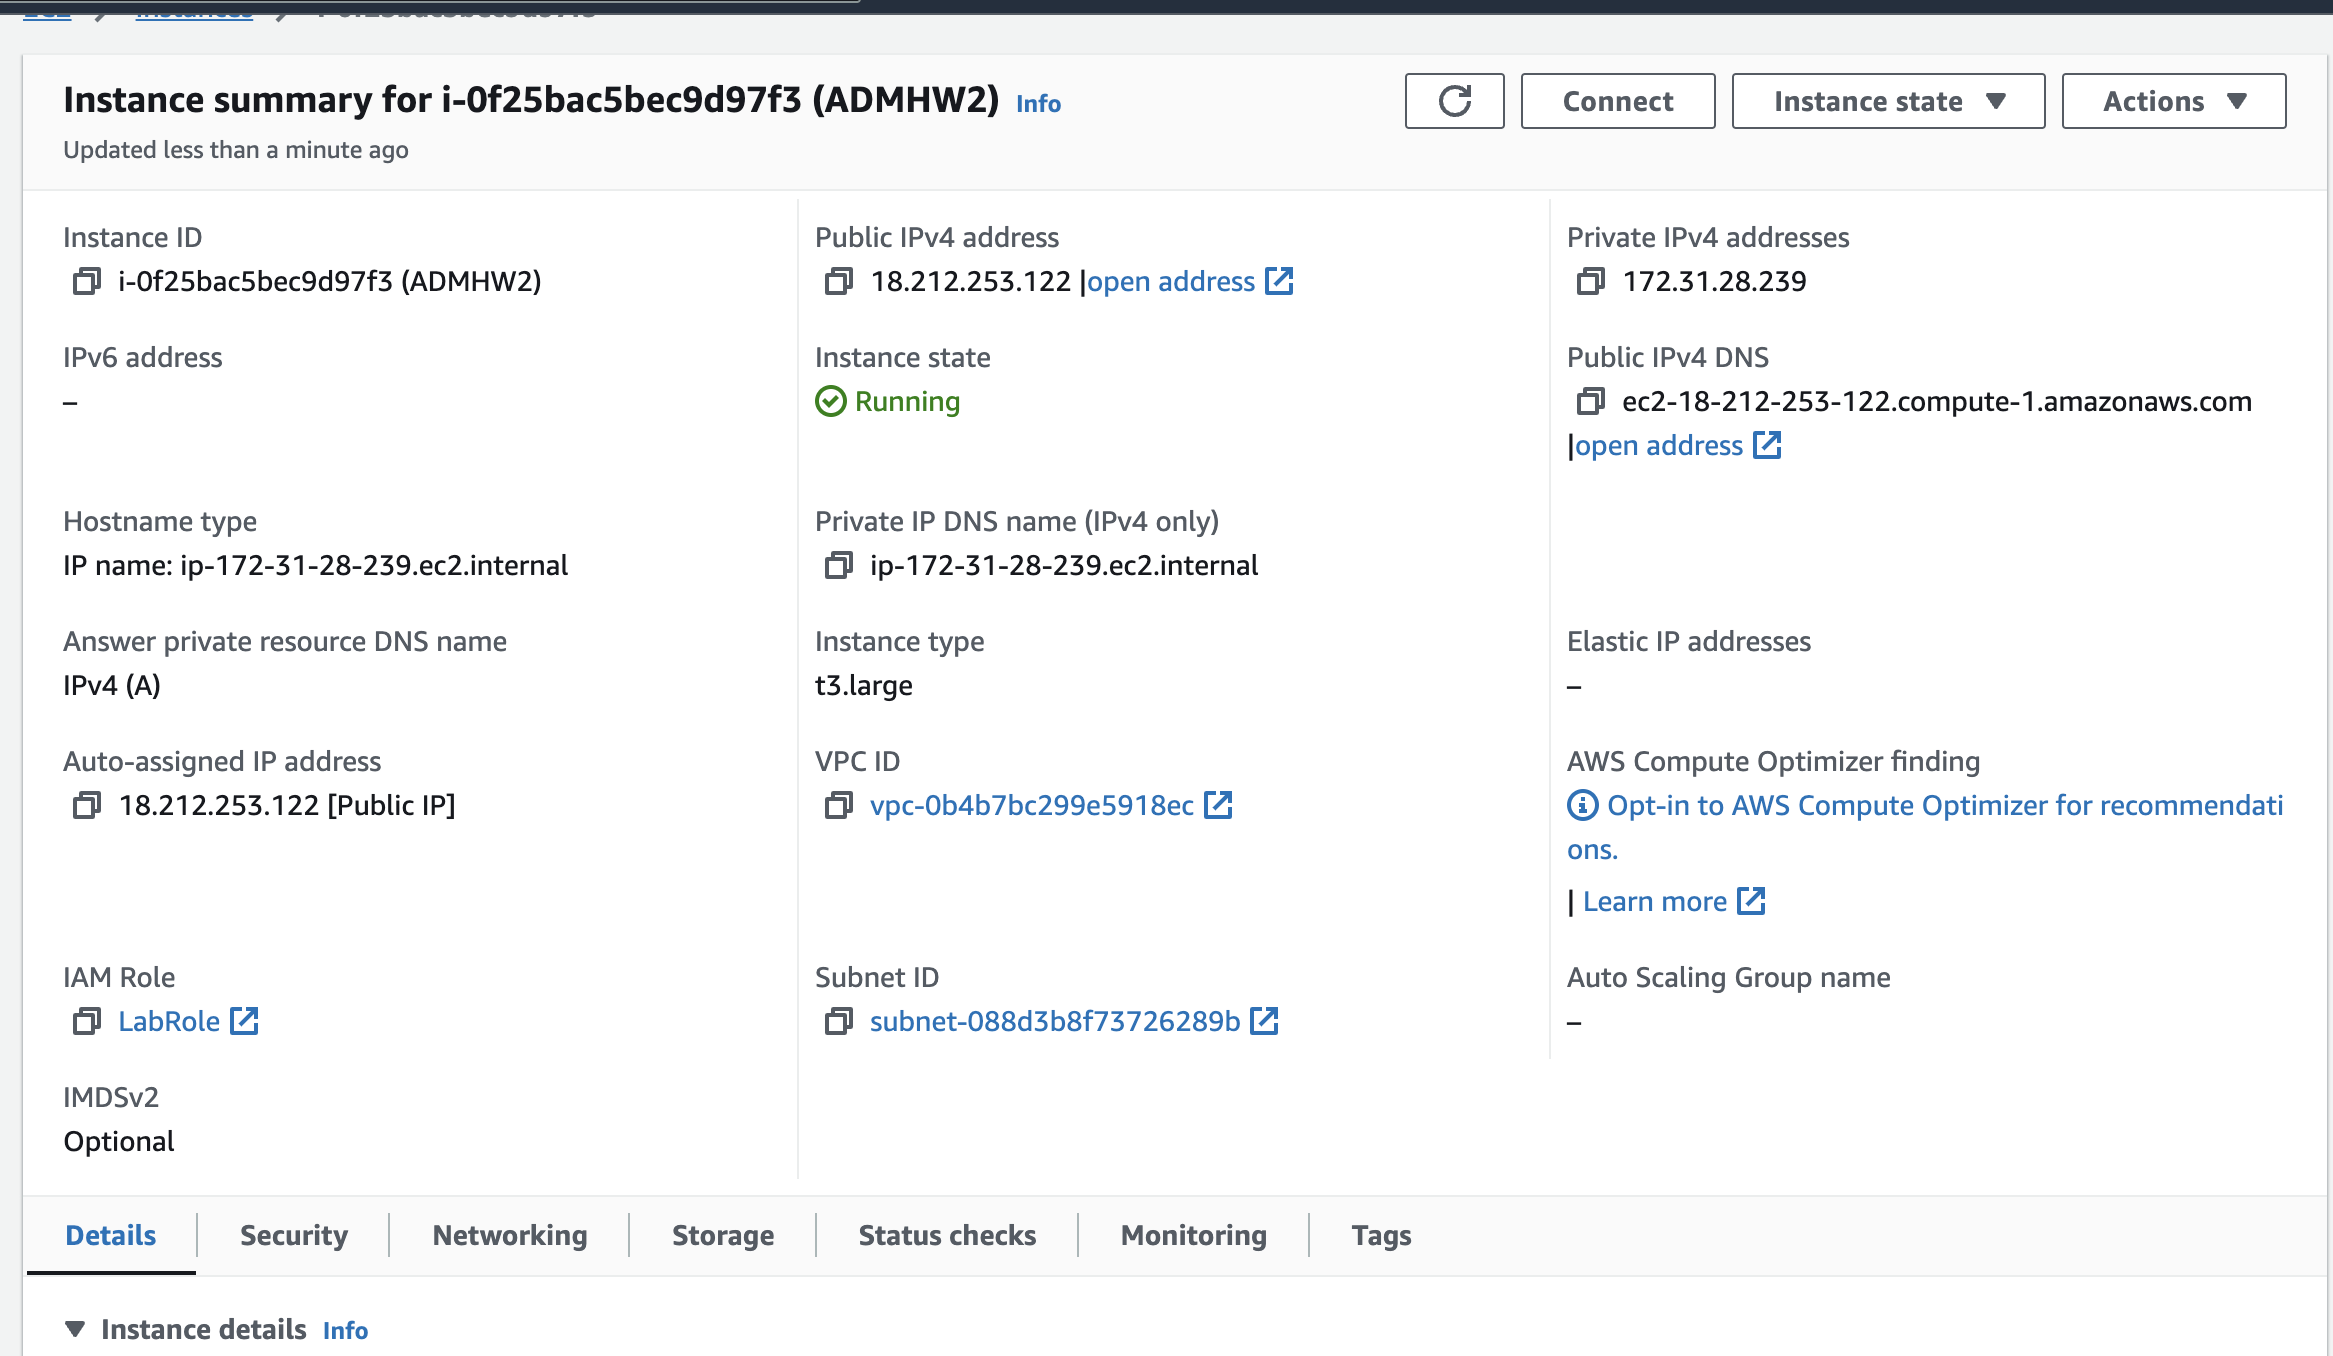

Then I copied the AWS folder containing the necessary files from my system to EC2 instance after connecting to it from the command line as in the following screenshots:
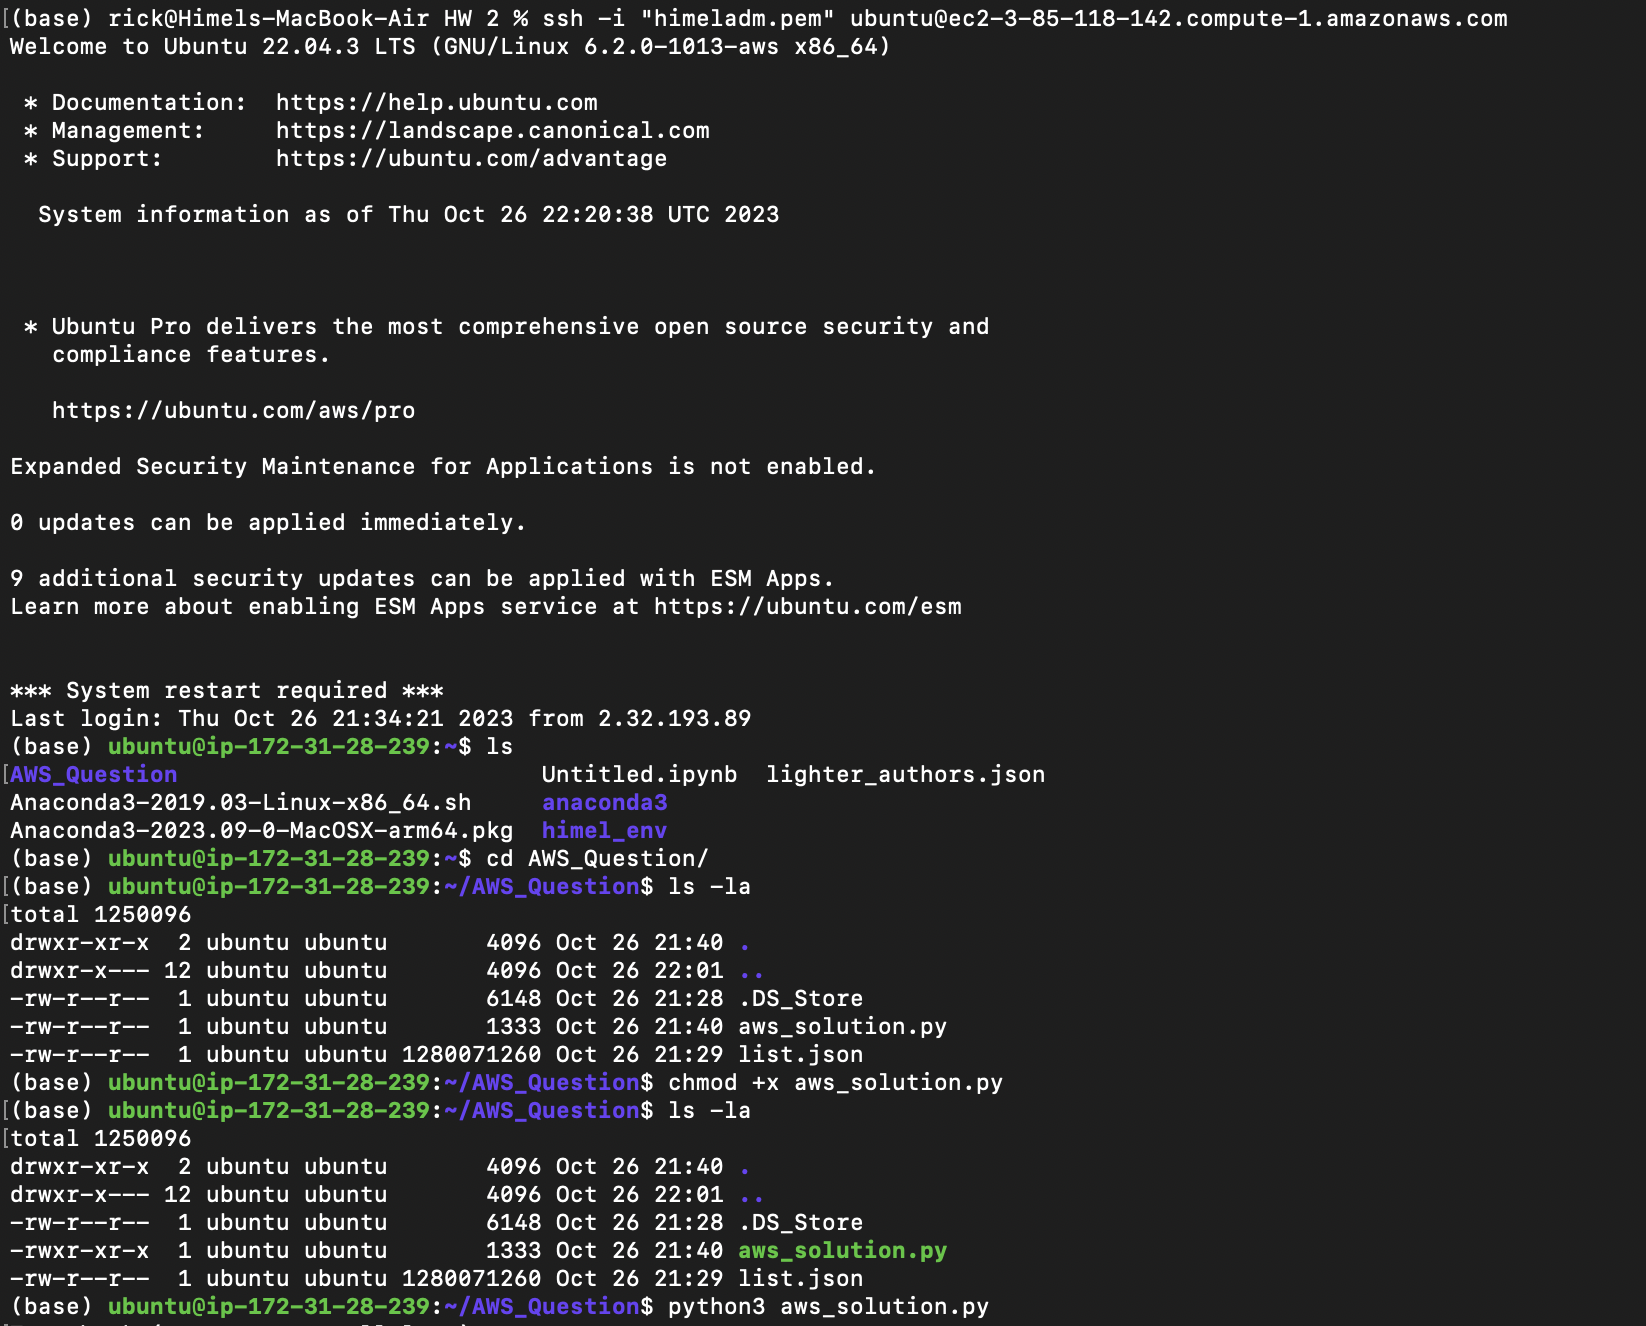



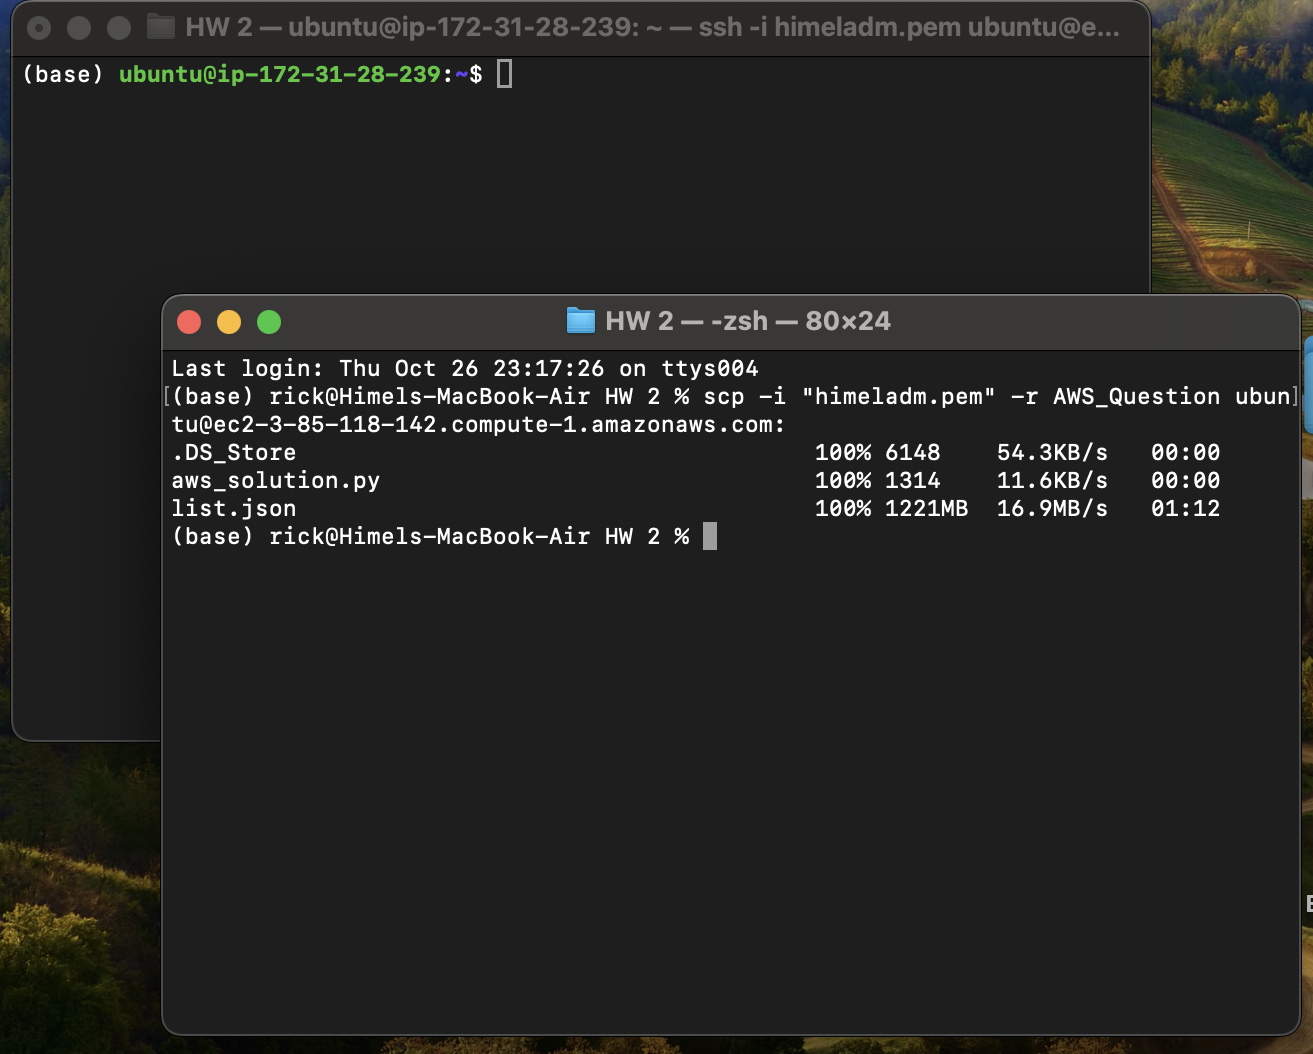

Then I run the script commands in the aws ubuntu:

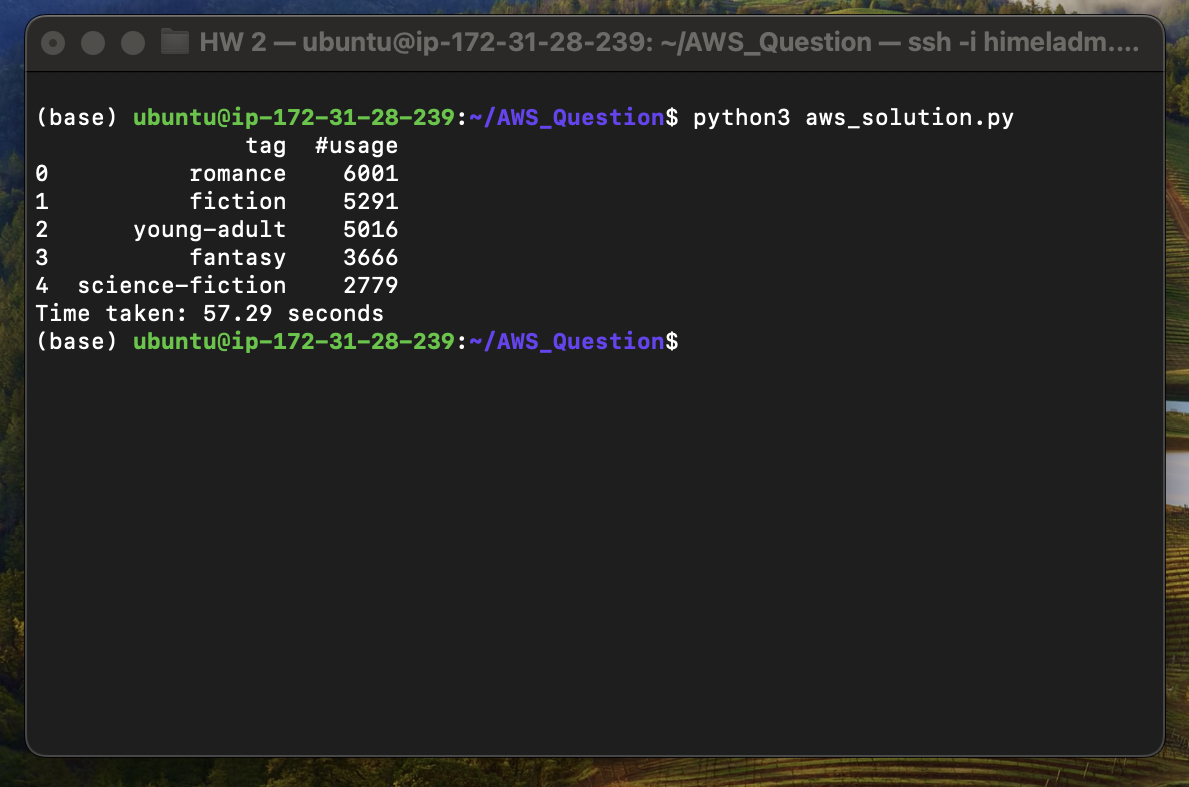

**In the EC2 ubuntu, it took 57.29 seconds to run the same script while it took 53.34 seconds in my own macbook.**

##Algorithmic Question (AQ):

In [ ]:
from collections import deque

# Read the number of instructions
num_instructions = int(input())

# Initialize a deque to represent the bookshelf
bookshelf = deque()

# Process each instruction
for _ in range(num_instructions):
    instruction = input().split()
    action, book_id = instruction[0], int(instruction[1])

    if action == 'L':
        # Place the book to the left of the leftmost existing book
        bookshelf.appendleft(book_id)
    elif action == 'R':
        # Place the book to the right of the rightmost existing book
        bookshelf.append(book_id)
    elif action == '?':
        # Calculate the minimum number of books to pop from both sides
        left_count = bookshelf.index(book_id)
        right_count = len(bookshelf) - left_count - 1
        # Print the result
        print(min(left_count, right_count))

8
L 75
R 20
R 30
L 11
? 75
1
L 12
L 15
? 20
1


''' 2---> According to LLM Chatbot tool :

To analyze the time complexity of the provided code, we can break it down into its main operations:

Looping through the boss's instructions: This operation takes O(n) time, where 'n' is the number of instructions.
For each instruction, we perform the following operations:
For 'L' or 'R' instructions, we append to the deque, which takes O(1) time.
For '?' instructions, we use the index method to find the position of the book, which takes O(k) time, where 'k' is the position of the book in the deque.
In the worst case, 'k' could be equal to the length of the deque, making it O(n).
Printing the result in each '?' instruction takes O(1) time.

Given these considerations, the overall time complexity of the code is O(n^2) in the worst case,
as the worst-case scenario occurs when each '?' instruction has to search through the entire deque, and there are 'n' such instructions.
'''

'''We believe the instructions given by the LLM Chatbot tool is correct and
upon observation with different input sizes  we can see that the most expensive operation in the code is to calculate the ? instructions.'''

''' NO the code provided above is not the optimal code , we can reduce the time complexity of the above code by using a different data structure called dictionary. The time complexity for it can be reduced to O(n)
    
    Algorithm:

    Initialize an empty dictionary called book_positions
Initialize an empty list called bookshelf

Read num_instructions

For i in range(num_instructions):
    Parse the instruction into action and book_id
    
    If action is 'L':
        Insert book_id at the beginning of bookshelf
        Store the position of book_id in book_positions
    
    If action is 'R':
        Append book_id to the end of bookshelf
        Store the position of book_id in book_positions
    
    If action is '?':
        Retrieve book_id's position from book_positions
        Calculate left_count as min(book_id's position, length of bookshelf - book_id's position - 1)
        Print left_count


efficient O(1) time complexity for the '?' instructions.
'''